# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
#load dataset
df = pd.read_csv('stock_data.csv')

In [ ]:
# creating a copy of each dataset
data = df.copy()

In [ ]:
# check first 5 rows of dataset
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# last 5 rows of dataset
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


There are a couple columns with words that I will probably end up converting to categories (if they are not already), but most columns consist of numerical data which is good because it is easy to work with. I will check the datatypes for each and make sure correct columns are cat, and others are int.

In [ ]:
# check rows and columns
data.shape

(340, 15)

There are 340 datapoints in our dataset, and 15 different columns/variables.

In [ ]:
# check var datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Looks like there is no missing data. All numerical data is either int or float, which works. All other variables are object, which I may convert to cat.

In [ ]:
# check data stats
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


- Current price has a large range from about 4 to about 1275. This column will most likley be a heavy predictor for which group a datapoint falls into.
- Net cash flow and net income consists of very large numbers; whole column is converted to scientific notation.

In [ ]:
#check for duplicates
data.duplicated().sum()

0

No duplicated rows.

In [ ]:
# ensure no missing vals
data.isna().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


No missing values.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

I will plot all the object columns to better understand those vars. Then, I will use a function to plot a boxplot and histogram for all the numeric columns. Then, I will answer the guided questions above.

In [ ]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# we do not need to plot ticker symbol because it is a unique identification code for each datapoint.
# We will probably delete this column from the dataset because it will not provide any information.
# check how many unique vals in 'Ticker Symbol'
data['Ticker Symbol'].nunique()

340

In [ ]:
# According to the variable descriptions, it looks like 'Security' is supposed to be compay name
# I think each name is unique as well, and if that is the case, we cannot plot this, and will probably drop this col too.
# check how many unique vals in 'Security'
data['Security'].nunique()

340

Every value in both 'Ticker Symbol' and 'Security' is unique, so we will drop these columns after the first exploratory data analysis.

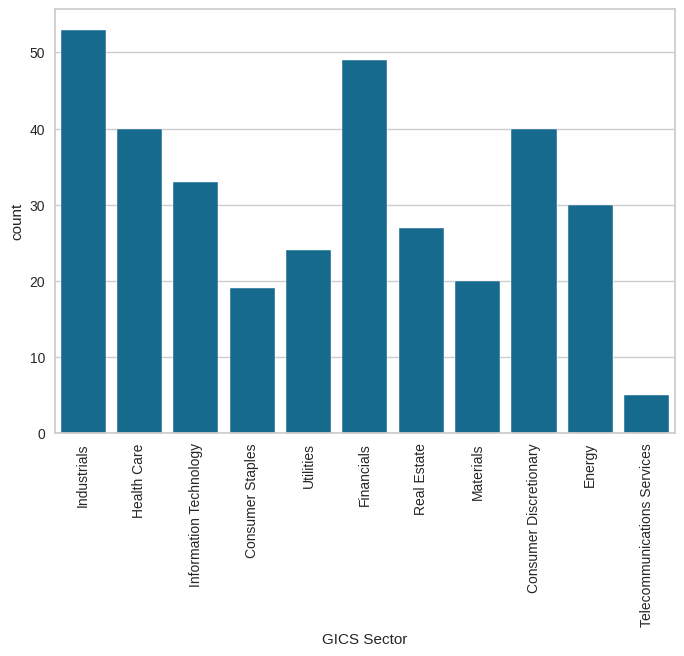

In [ ]:
# create countplot for GICS Sector column
sns.countplot(data=data, x='GICS Sector')
plt.xticks(rotation=90)
plt.show()

Most datapoints fall into Industrials and Financials GIS Sectors.

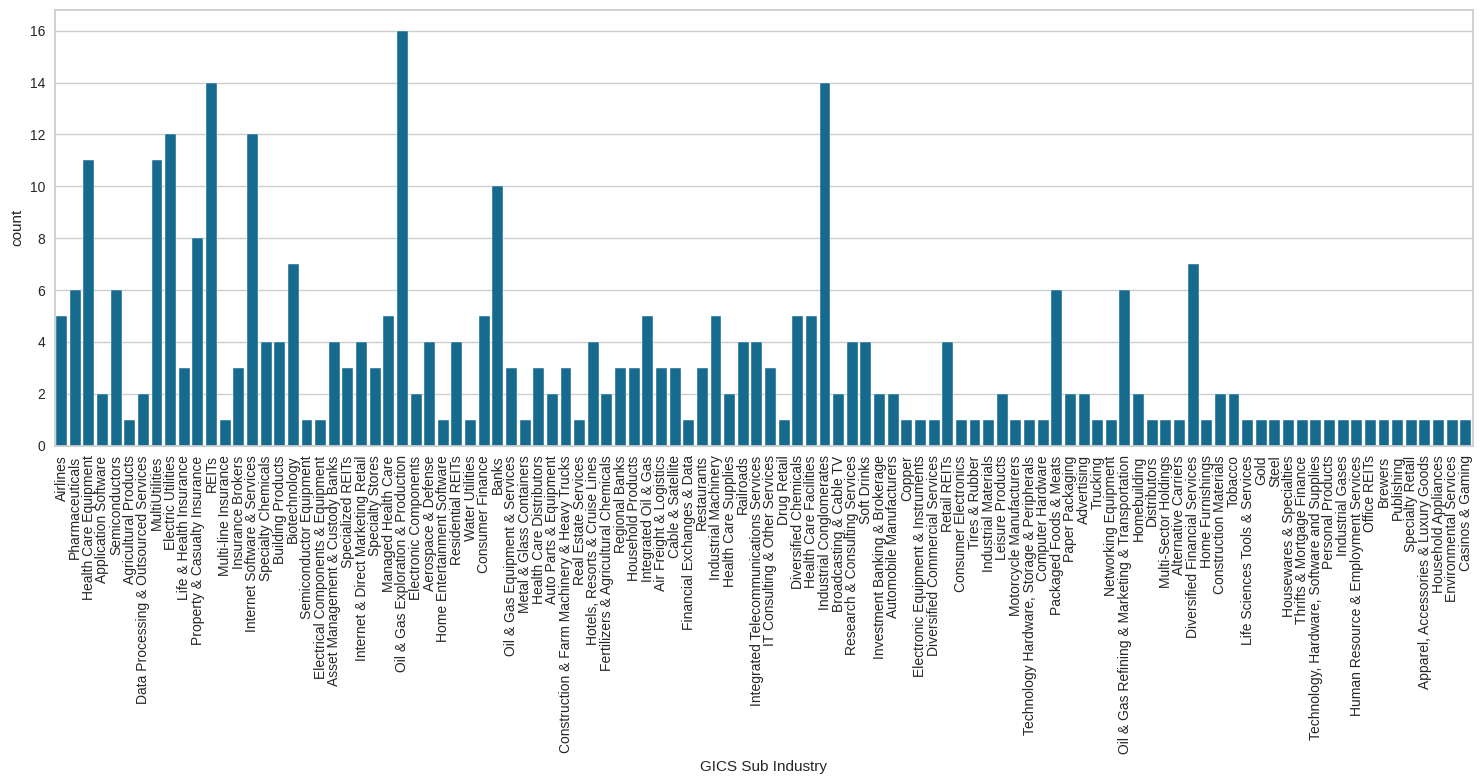

In [ ]:
# create countplot for GICS Sub Industry column
plt.figure(figsize=(15, 8))
sns.countplot(data=data, x='GICS Sub Industry')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Data is pretty spread out in terms of sub industries, but most falls into Oil & Gas Exploration & Production, followed by Industrial Conglomerates and REITS.

In [ ]:
#function to plot a box plot and histogram for all numerical variables

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    f2.suptitle(feature, fontsize=16)  # Add the title to the figure
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for title
    plt.show()

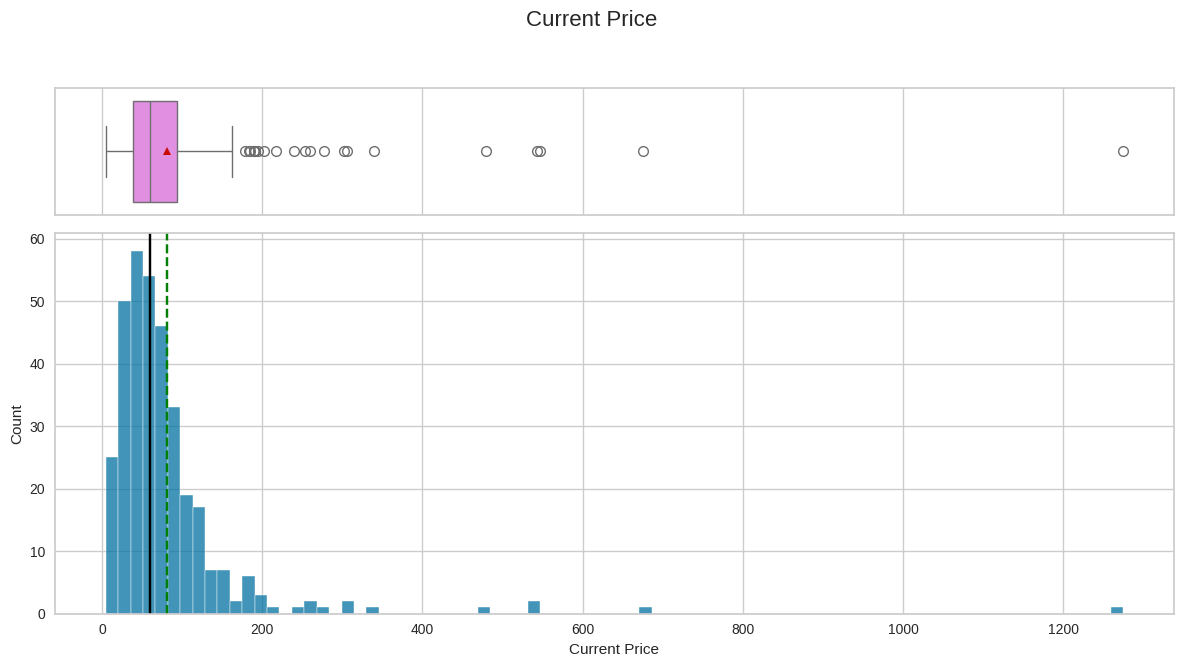

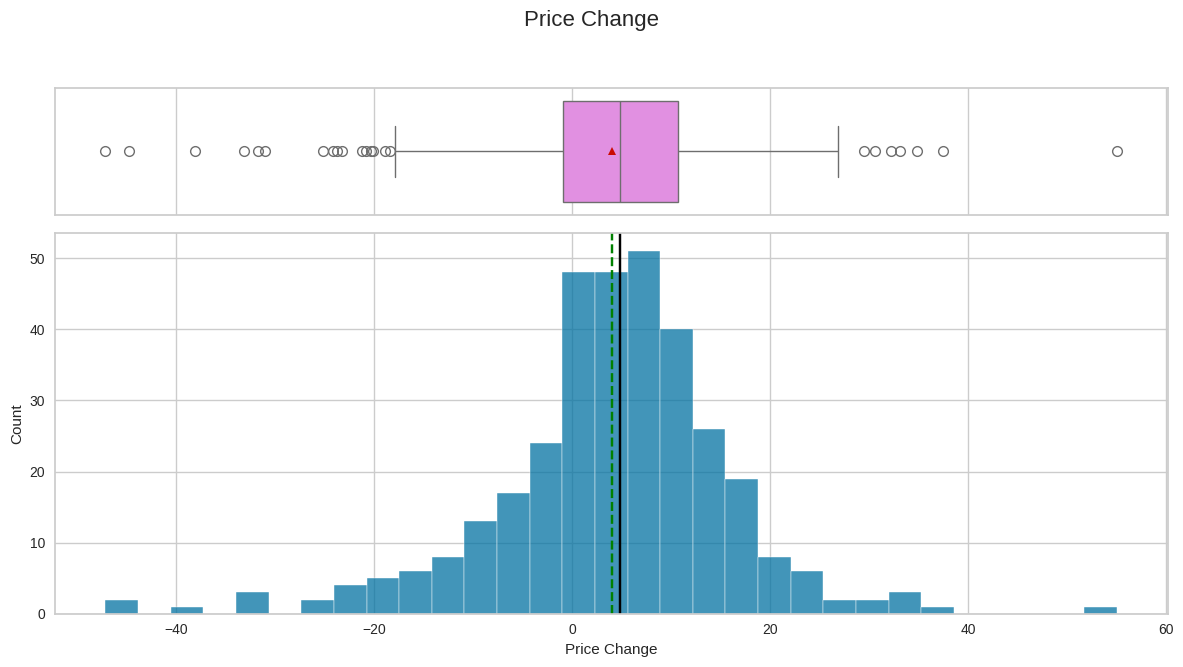

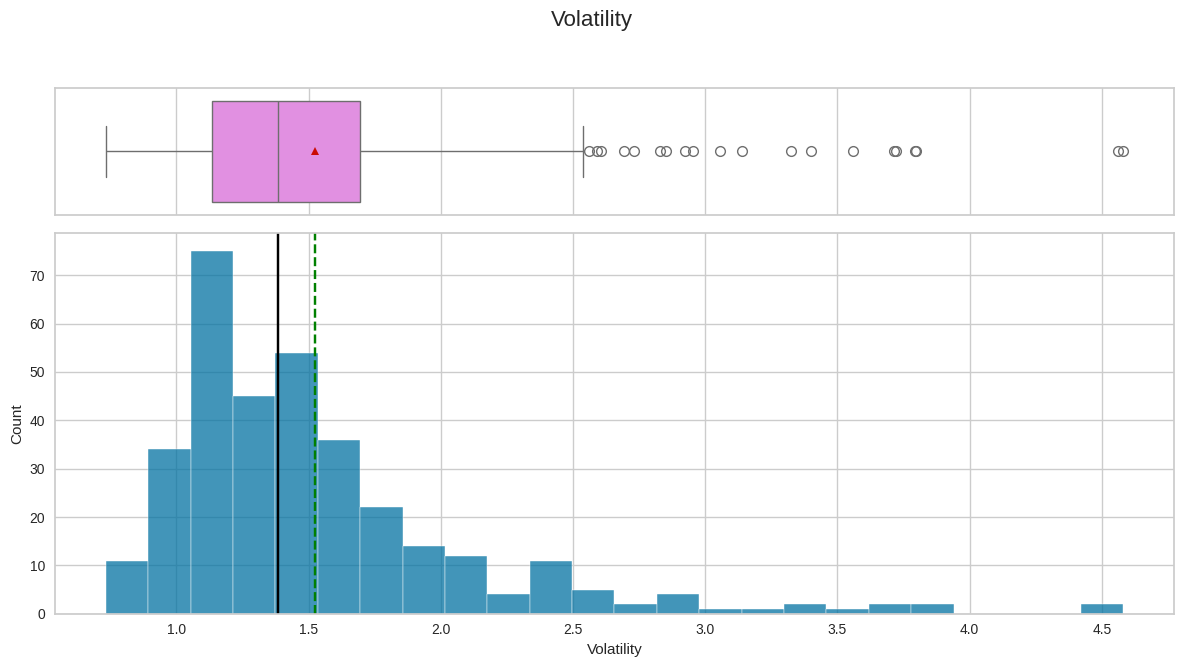

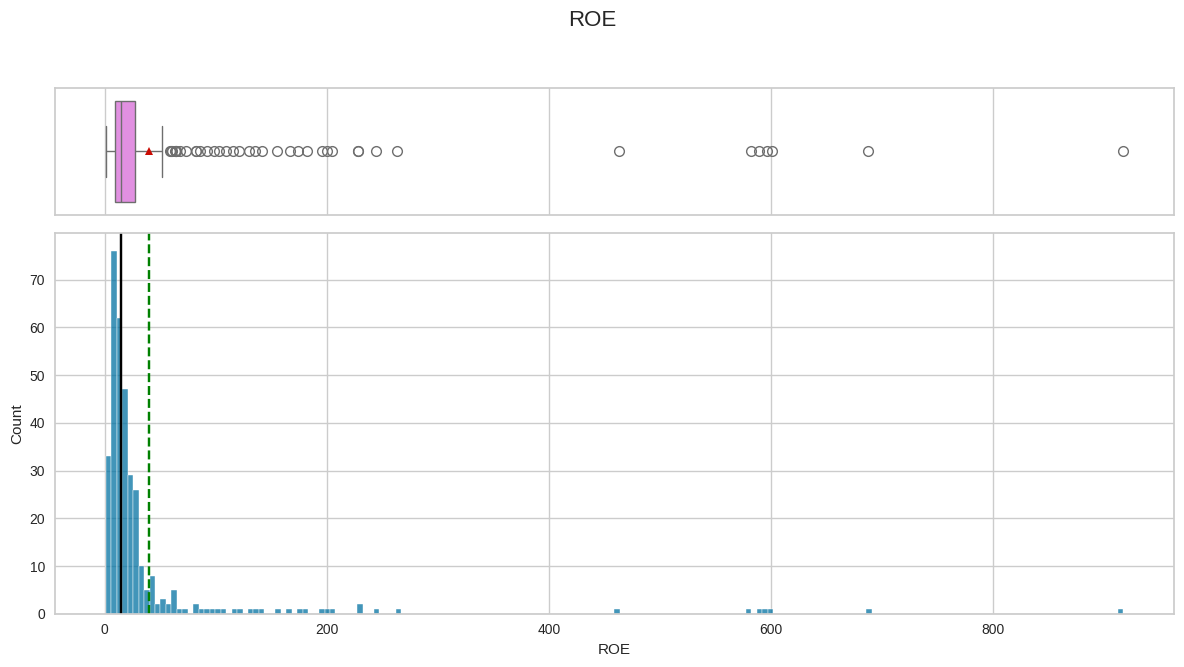

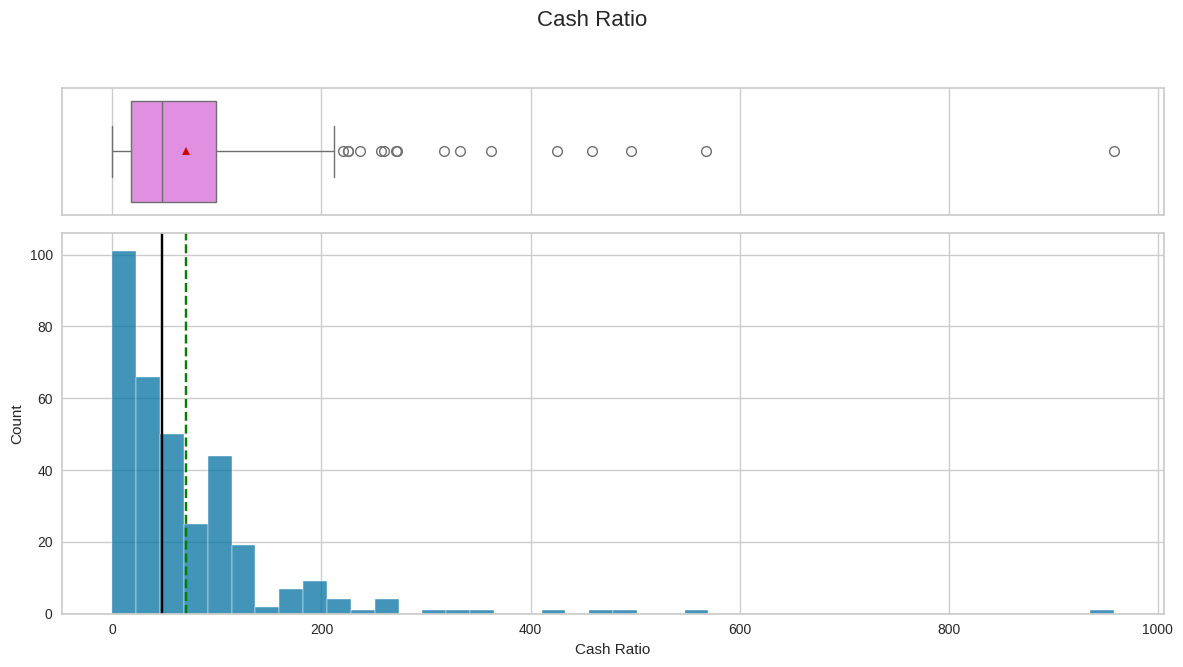

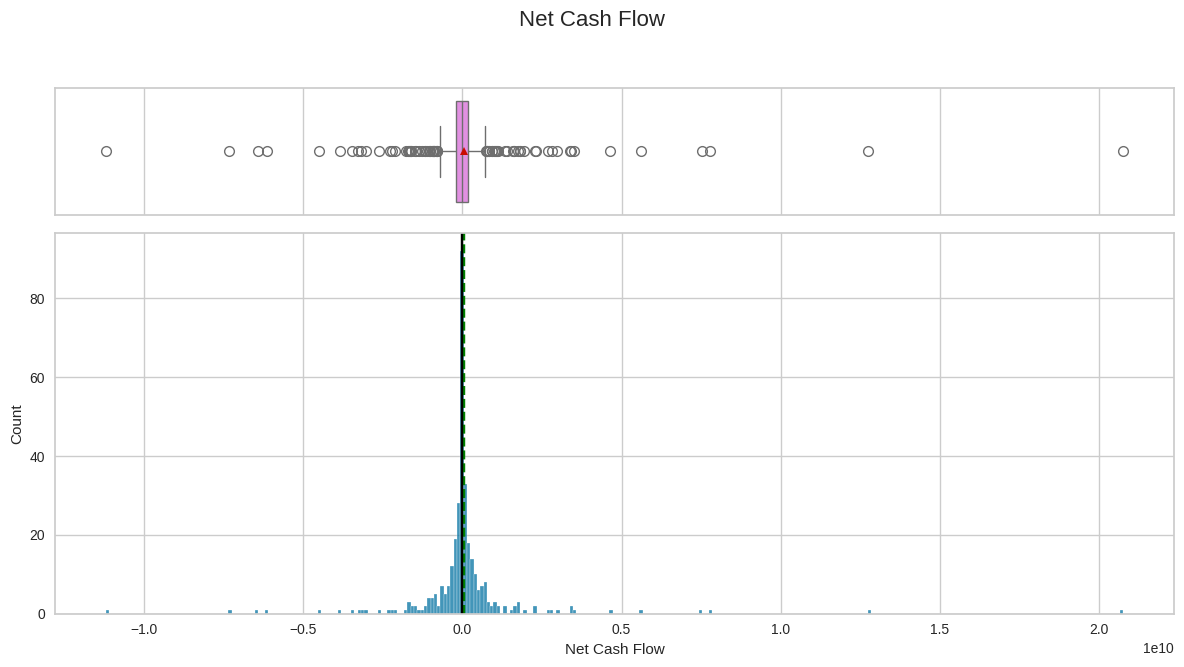

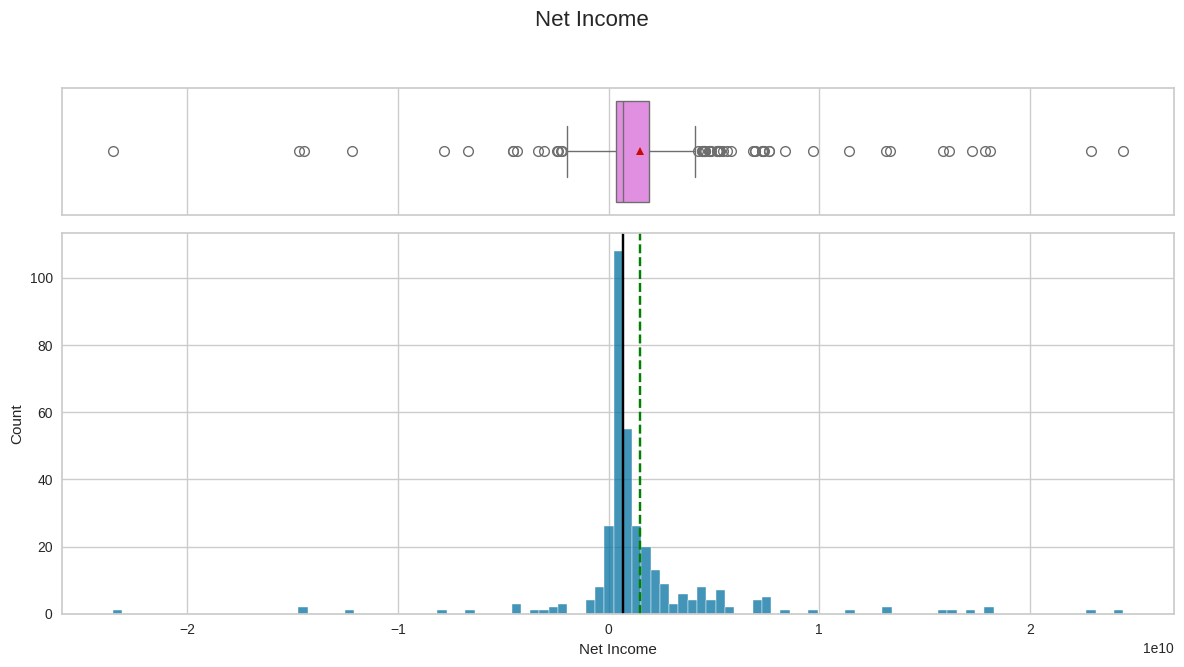

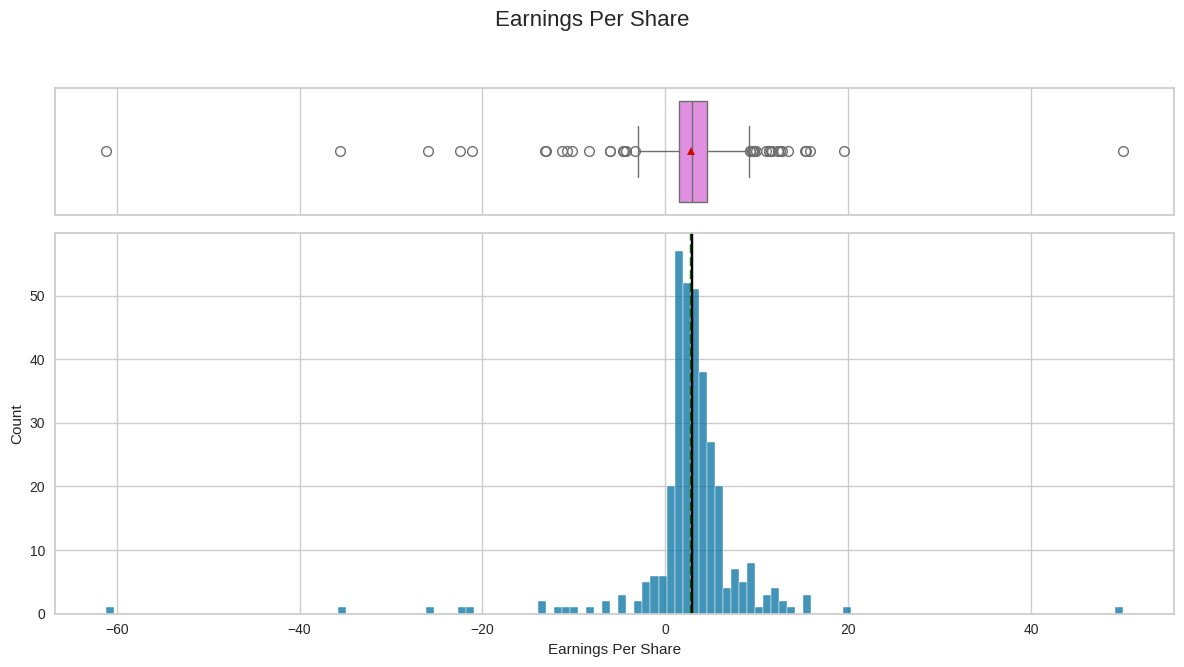

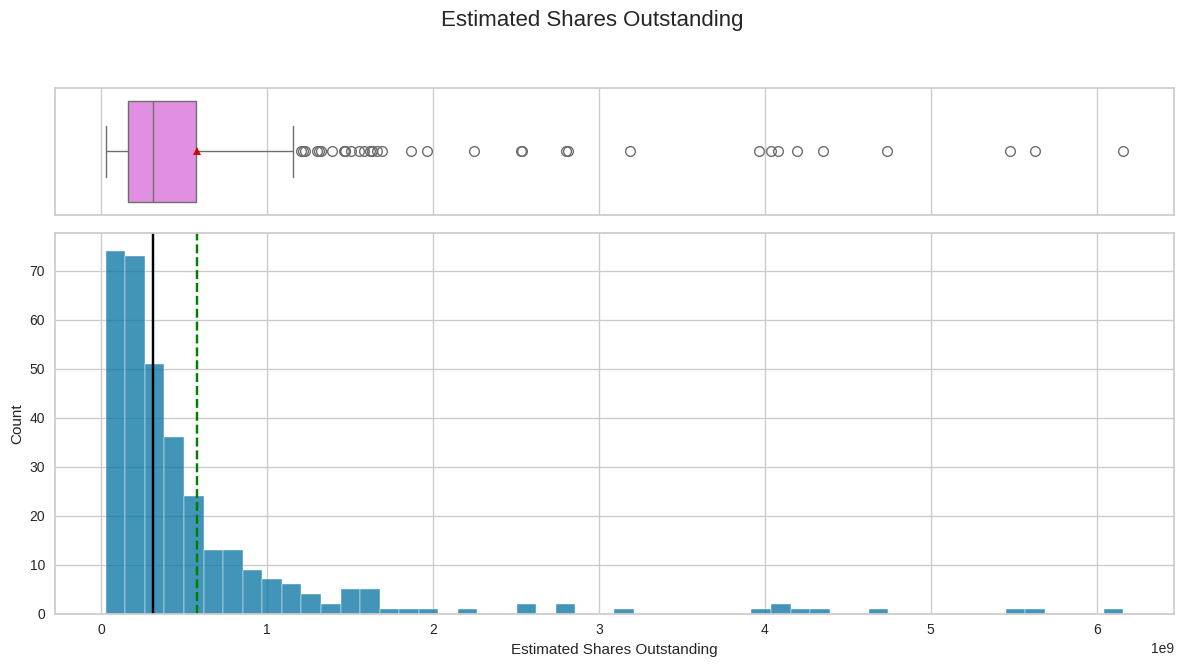

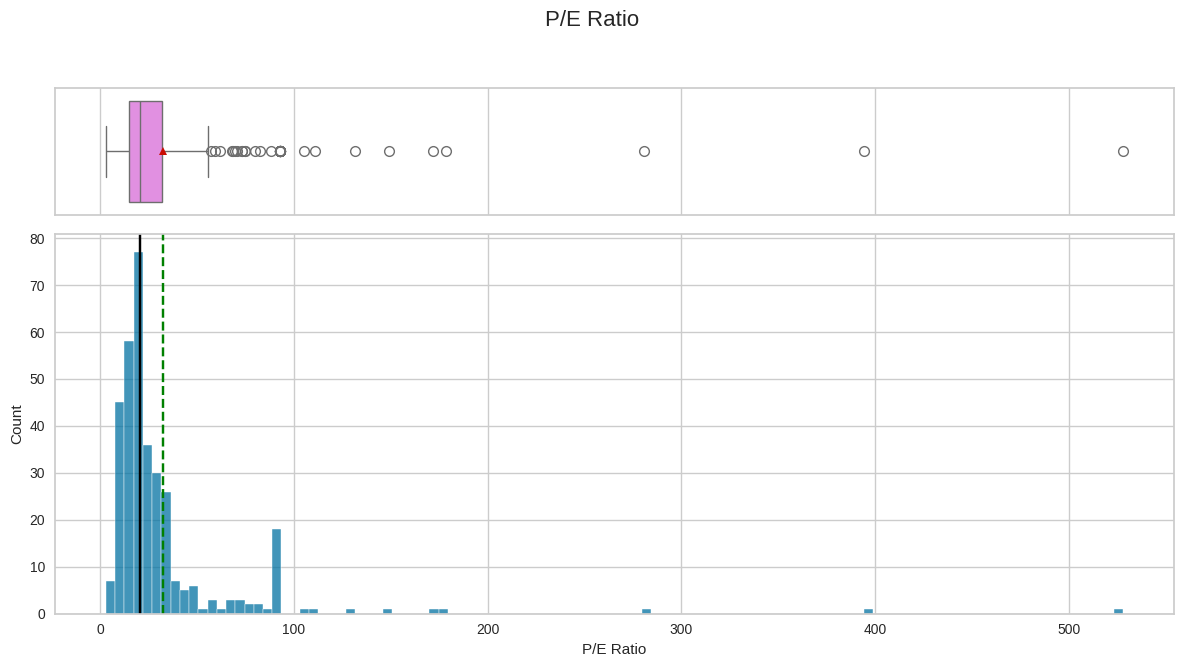

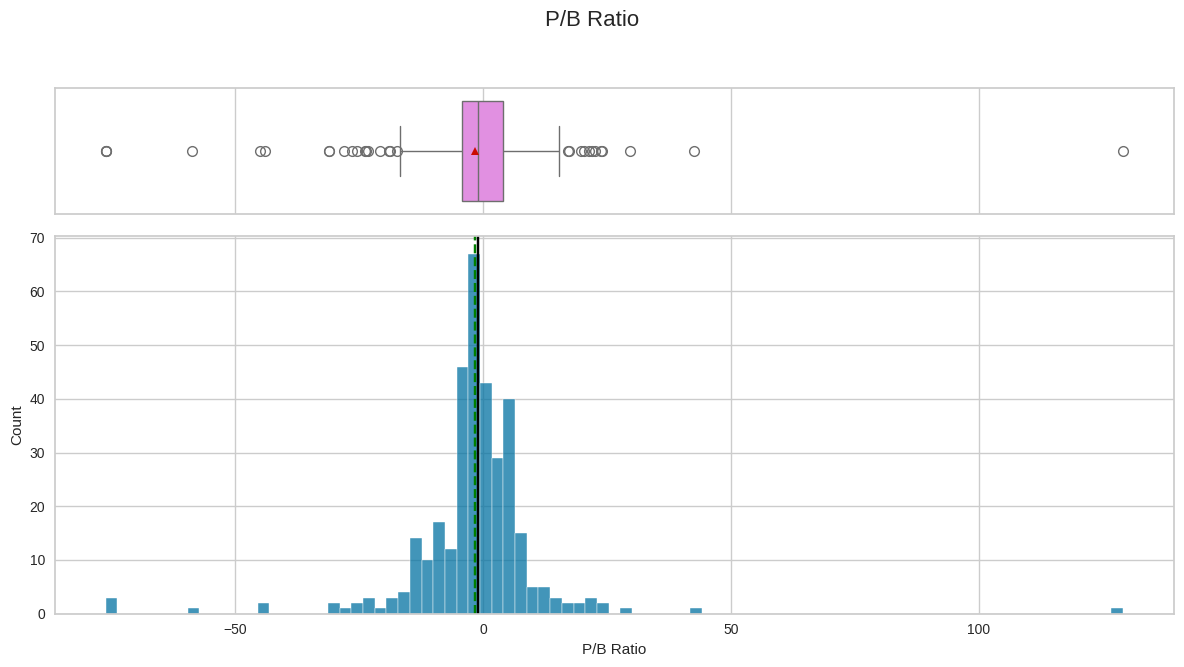

In [ ]:
# plotting all features

# Loop through each feature in the DataFrame, starting from the 5th column
for feature in data.columns[4:]:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

1. What does the distribution of stock prices look like?

The prices distribution is right skewed, with the median to the left of the mean. This tells me most datapoints are clustered towards the lower end of the plot, and most of the stock market prices were on the lower end. The long tail also shows me there are a couple of very significant outliers in the price column.

2. The stocks of which economic sector have seen the maximum price increase on average?

<Axes: xlabel='GICS Sector', ylabel='Price Change'>

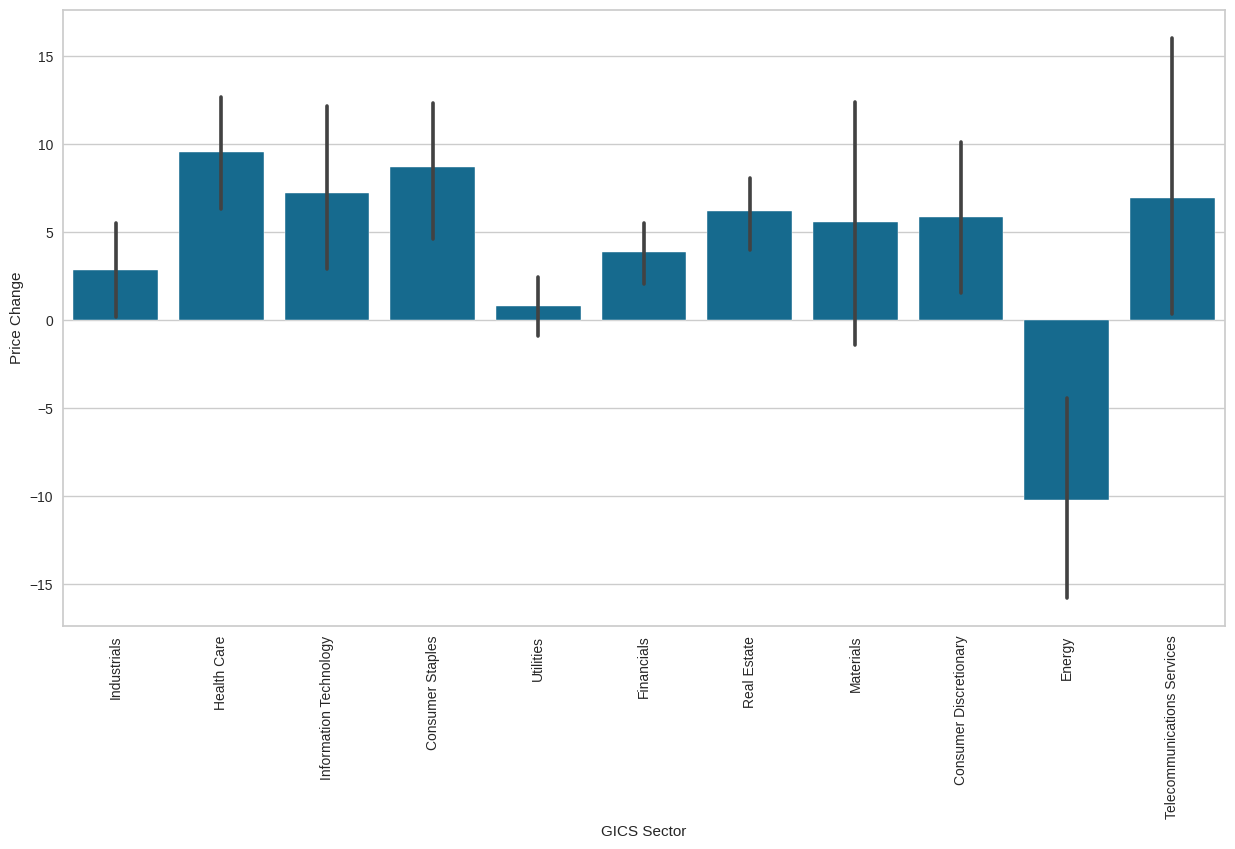

In [ ]:
# make barplots for price change with GIS Sector on the x axis
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(data=data, x='GICS Sector', y='Price Change')

Health care saw the largest price increase on average.

3. How are the different variables correlated with each other?

In [ ]:
# create var to hold num vars
num_vars = data.select_dtypes(include=['int64', 'float64'])

<Axes: >

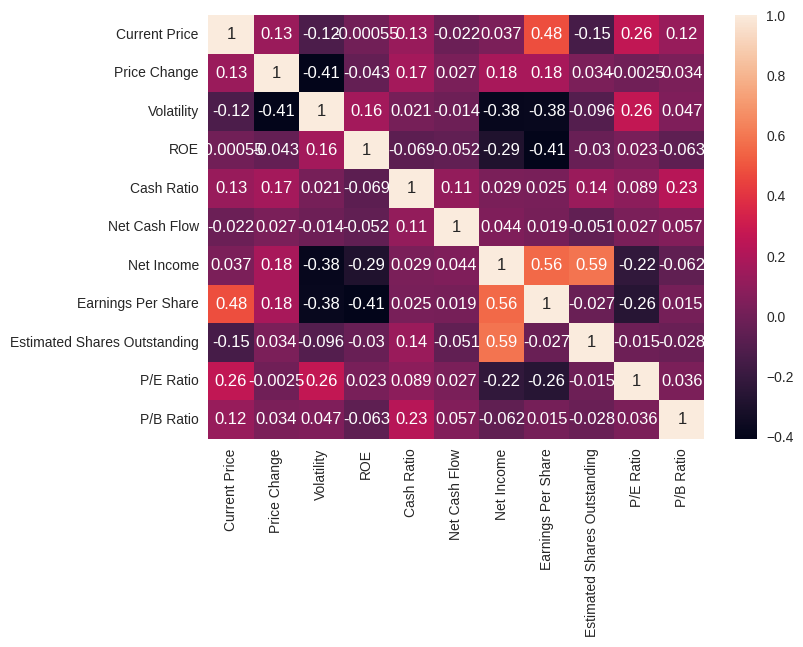

In [ ]:
sns.heatmap(num_vars.corr(), annot=True)

No super high correlations amongst variables, which is good because there may be less issues with multicollinearity. The largest correaltions are positive correlations between Net Income and Estimated Shares Outstanding, Net Income and Earnings Per Share, and Earnings Per Share and Current Price.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

<Axes: xlabel='GICS Sector', ylabel='Cash Ratio'>

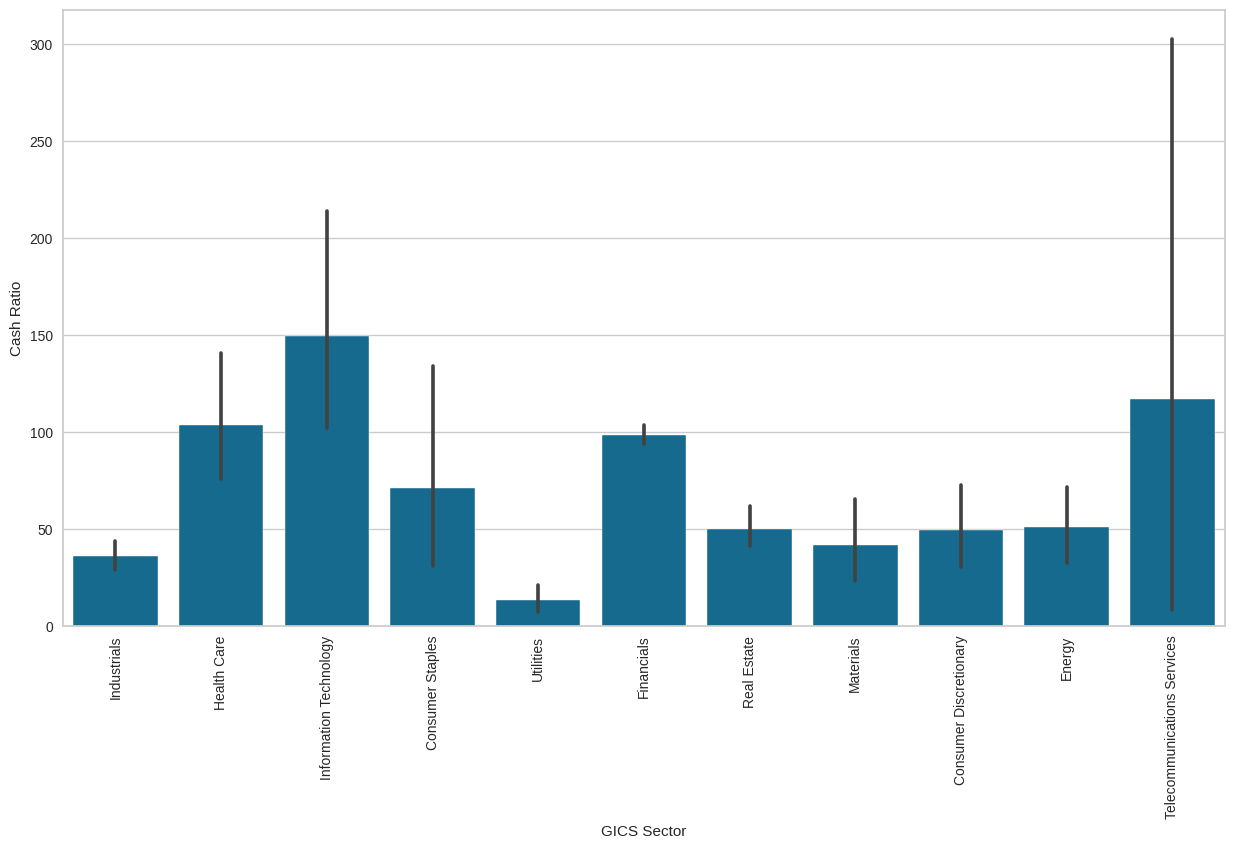

In [ ]:
# create barplots for cash ratio for each sector
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(data=data, x='GICS Sector', y='Cash Ratio')

Information Technology has the highest average cash ratio, but telecommunication services also has a high cash ratio with an even higher range.Utilities has the lowest cash ratio, followed by Industrials.

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

<Axes: xlabel='GICS Sector', ylabel='P/E Ratio'>

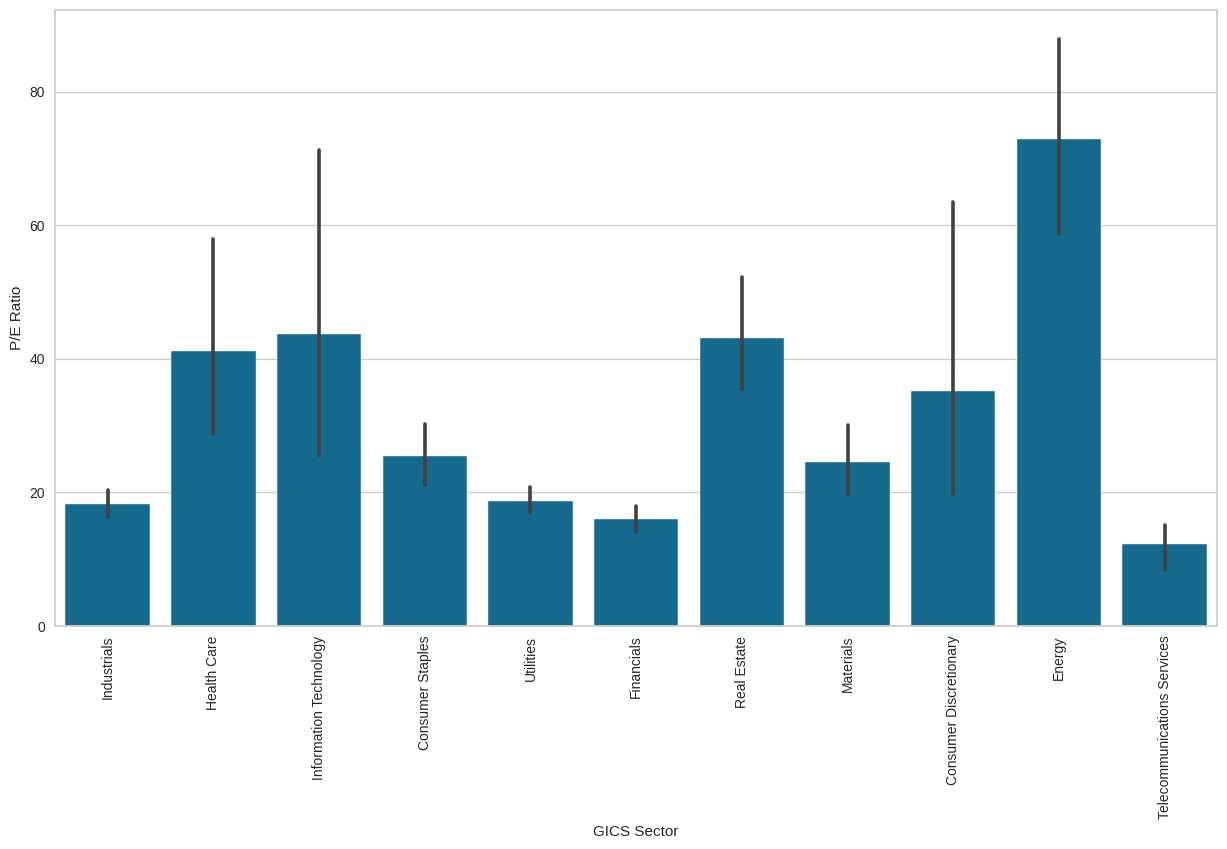

In [ ]:
# create barplots for P/E ratio for each sector
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(data=data, x='GICS Sector', y='P/E Ratio')

Energy has the highest P/E ratio by far. There are many other sectors that have a relatively low P/E ratio. Telecommunications services is the lowest, followed by financials, industrials, and utilities.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
#check for duplicates in data
data.duplicated().sum()

0

No duplicates

In [ ]:
# check for missing values
data.isna().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


No missing values. No missing value treatment needed.

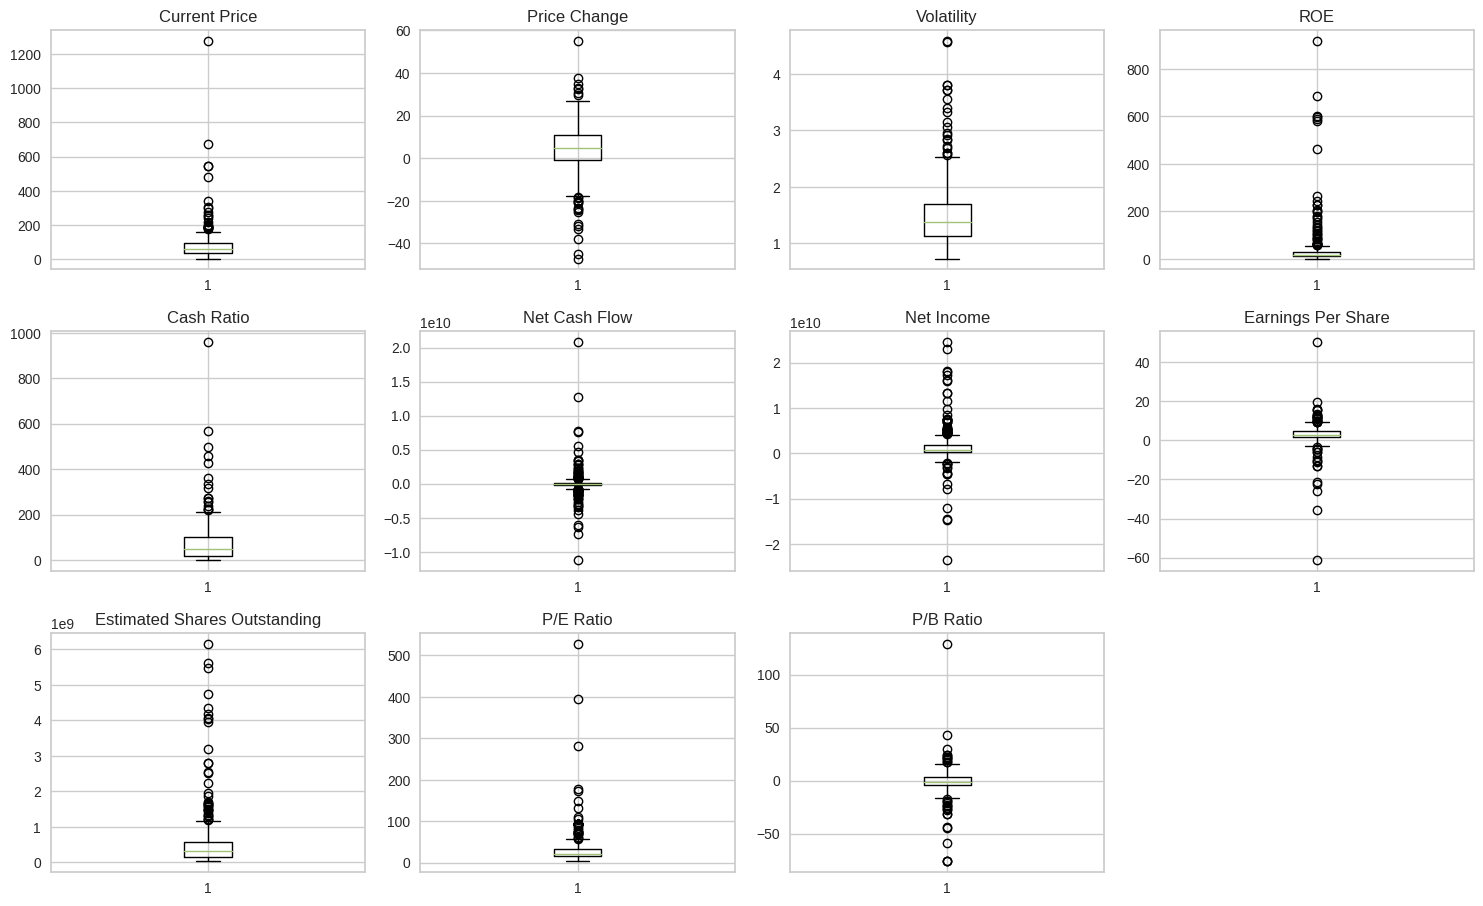

<Figure size 800x550 with 0 Axes>

In [ ]:
#outlier detection using boxplot

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_vars):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
plt.savefig("outliers.png")

For the most part, the outliers seem to follow a trend, but there are some extremem outliers I want to investigate more to ensure they are real datapoints.

In [ ]:
# check outlier on current price
data[data['Current Price'] >= 1000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.949951,3.190527,1.26834,29,184,-1671386000,2551360000,50.09,50935516.07,25.453183,-1.052429


Looks legitimate.

In [ ]:
# check outlier on price change
data[data['Price Change'] >= 40]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
136,FSLR,First Solar Inc,Information Technology,Semiconductors,65.989998,55.051683,2.075216,10,190,-355228000,546421000,5.42,100815682.7,12.175276,22.563791


Looks legitimate.

In [ ]:
# check outlier for volatality
data[data['Volatility'] >= 4]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.101788,4.559815,687,22,-3283000000,-14685000000,-22.43,654703522.1,28.407929,-1.840528
284,SWN,Southwestern Energy,Energy,Oil & Gas Exploration & Production,7.11,-44.798137,4.580042,200,2,-38000000,-4556000000,-6.07,402141680.4,93.089287,1.273530


Looks legitimate.

In [ ]:
# check outlier for ROE
data[data['ROE'] >= 400]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
18,ALLE,Allegion,Industrials,Building Products,65.919998,13.753230,1.283795,601,45,-90800000,153900000,1.60,96187500.0,41.199999,-0.877453
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.470001,11.397804,2.405408,917,80,698000000,-23528000000,-61.20,384444444.4,93.089287,4.970809
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.500000,-38.101788,4.559815,687,22,-3283000000,-14685000000,-22.43,654703522.1,28.407929,-1.840528
64,CHTR,Charter Communications,Consumer Discretionary,Cable & Satellite,183.100006,3.598507,1.697942,589,0,2000000,-271000000,-2.43,111522633.7,20.819876,-76.119077
67,CL,Colgate-Palmolive,Consumer Staples,Household Products,66.620003,4.781379,0.895471,463,27,-119000000,1384000000,1.53,904575163.4,43.542486,-0.548324
179,KMB,Kimberly-Clark,Consumer Staples,Household Products,127.300003,17.511309,0.870405,582,10,-170000000,1013000000,2.78,364388489.2,45.791368,-2.533011
278,SPGI,"S&P Global, Inc.",Financials,Diversified Financial Services,98.580002,14.044424,1.080858,596,51,-1016000000,1156000000,4.26,271361502.3,23.140846,-4.178927


Looks legitimate.

In [ ]:
# check outlier for cash ratio
data[data['Cash Ratio'] >= 600]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.22432,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467


Looks legitimate.

In [ ]:
# check outliers for net cash flow
data[data['Net Cash Flow'] >= 10000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
40,BAC,Bank of America Corp,Financials,Banks,16.830000,8.440722,1.418688,6,99,20764000000,15888000000,4.18,8.450695e+08,13.004785,-0.938007
167,INTC,Intel Corp.,Information Technology,Semiconductors,34.450001,14.035095,1.226022,19,162,12747000000,11420000000,2.41,4.738589e+09,14.294606,3.954975


Looks legitimate.

In [ ]:
# check outlier for earnings per share
data[data['Earnings Per Share'] >= 40]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.949951,3.190527,1.26834,29,184,-1671386000,2551360000,50.09,50935516.07,25.453183,-1.052429


Looks legitimate.

In [ ]:
# check outlier for P/E ratio
data[data['P/E Ratio'] >= 200]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
19,ALXN,Alexion Pharmaceuticals,Health Care,Biotechnology,190.750000,22.338380,2.022921,2,195,66000000,144000000,0.68,211764705.9,280.514706,-14.171389
26,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.890015,32.268105,1.460386,4,58,1333000000,596000000,1.28,465625000.0,528.039074,3.904430
226,NFLX,Netflix Inc.,Information Technology,Internet Software & Services,114.379997,11.145654,2.605949,6,65,695722000,122641000,0.29,422900000.0,394.413783,-5.700168


Looks legitimate.

In [ ]:
# check outlier for P/B ratio
data[data['P/B Ratio'] >= 50]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,66951851.85,31.040405,129.064585


Looks legitimate.

No problematic outliers. I will keep them all, as they all seem to be important data.

In [ ]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# feature engineering

# I am going to drop the first 2 columns in the dataset, as they are all unique, so they do not provide us with any useful sorting data.

data.drop(['Ticker Symbol', 'Security'], axis=1, inplace=True)

In [ ]:
data.head()

,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


We need to scale data before clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
data2 = data.drop(['GICS Sector', 'GICS Sub Industry'], axis=1)
data2_scaled = scaler.fit_transform(data2)

In [ ]:
# creating a dataframe of the scaled data
data_scaled = pd.DataFrame(data2_scaled, columns=data2.columns)

In [ ]:
data_scaled.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## EDA

- It is a good idea to explore the data once again after manipulating it.

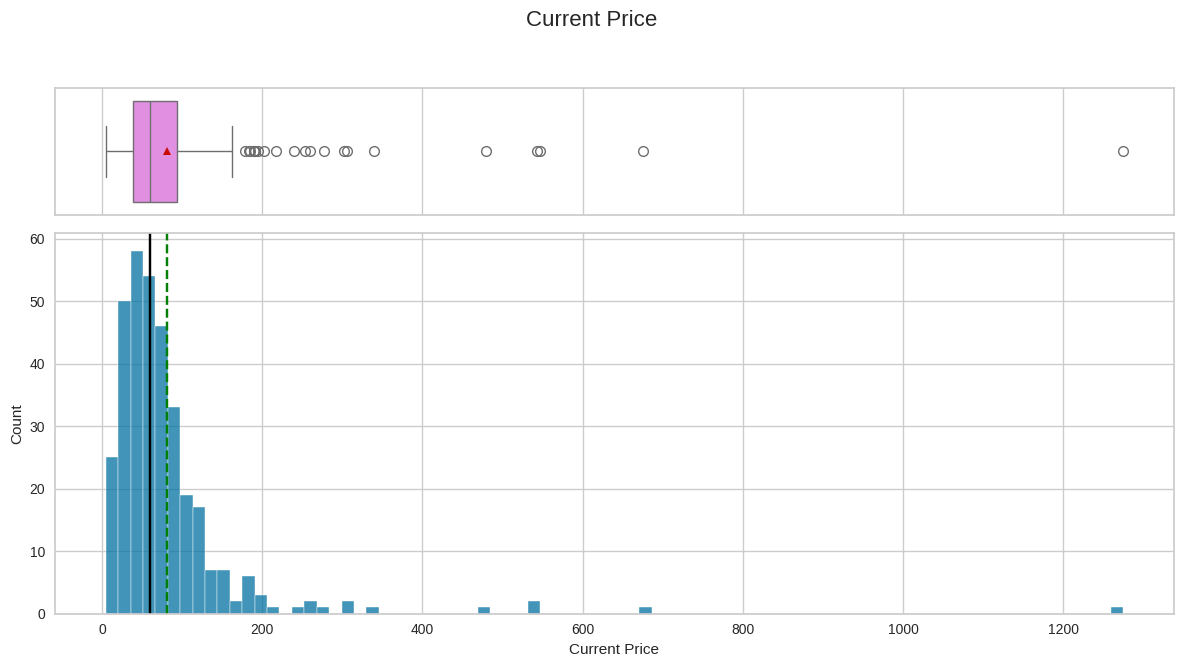

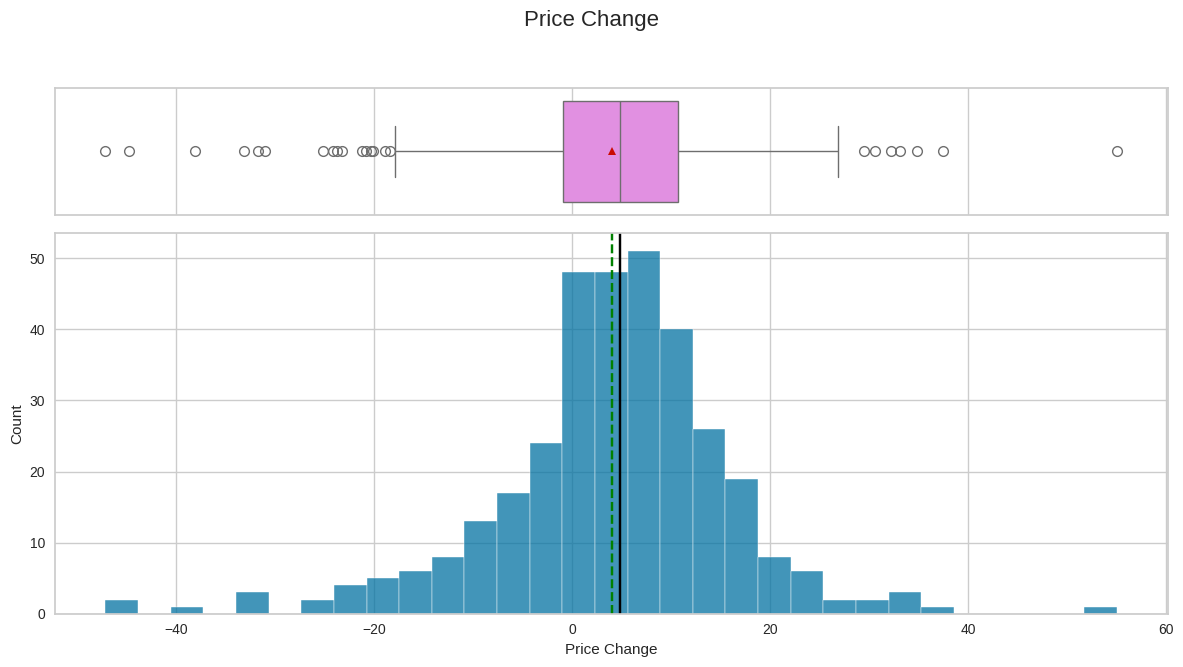

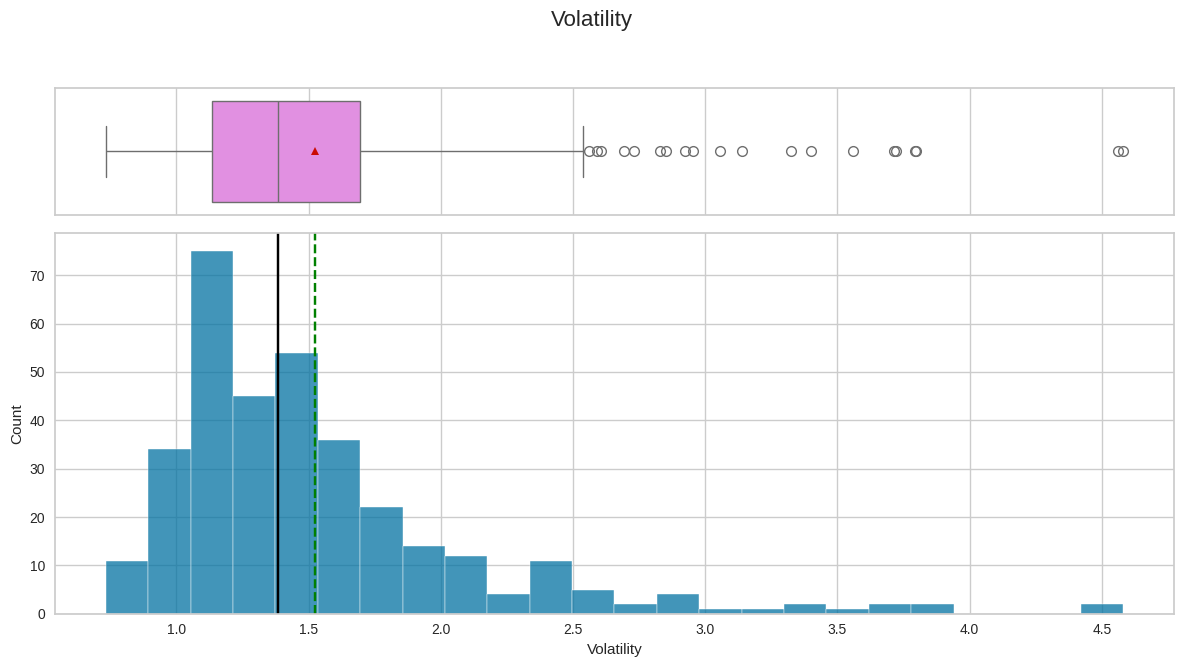

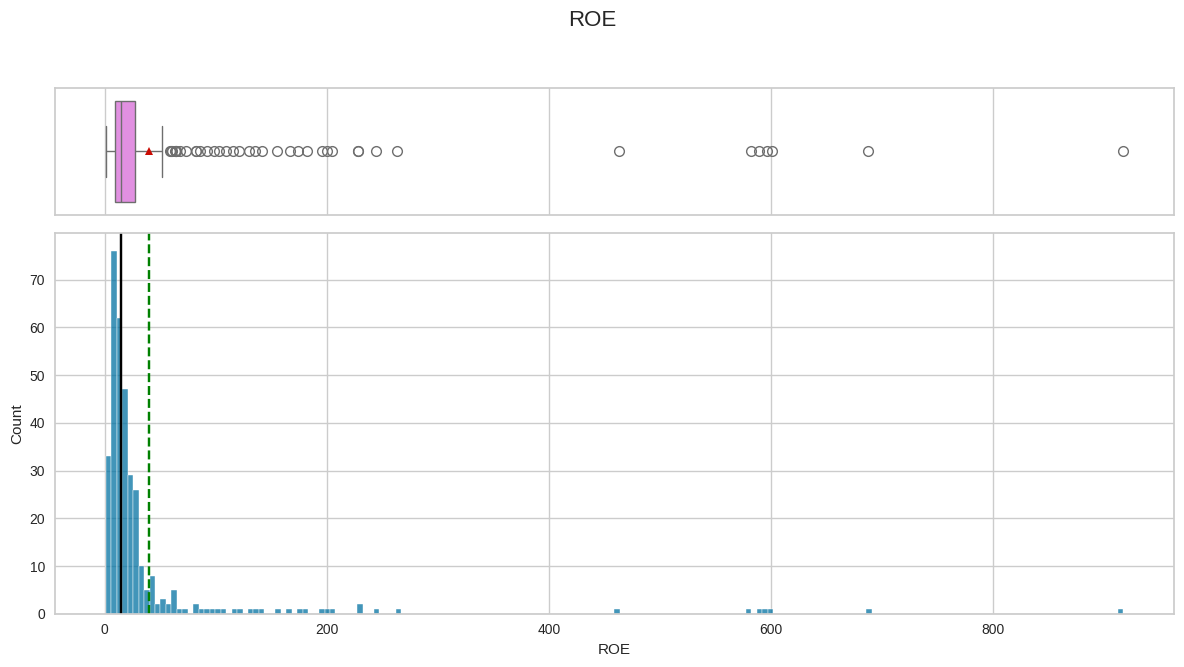

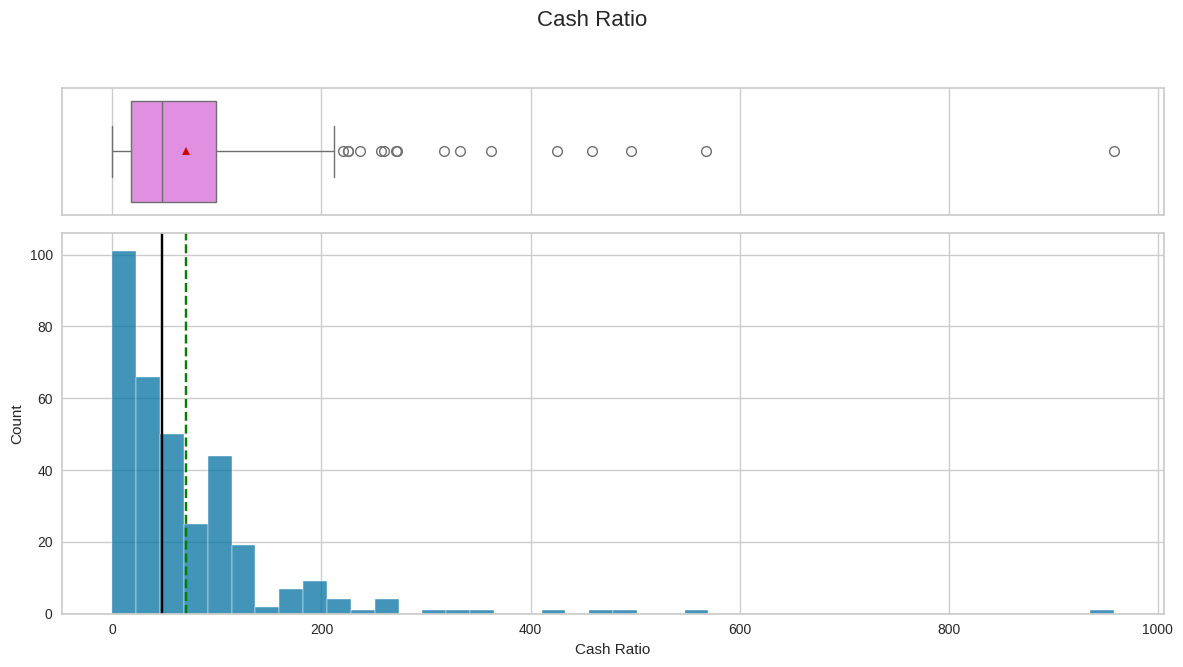

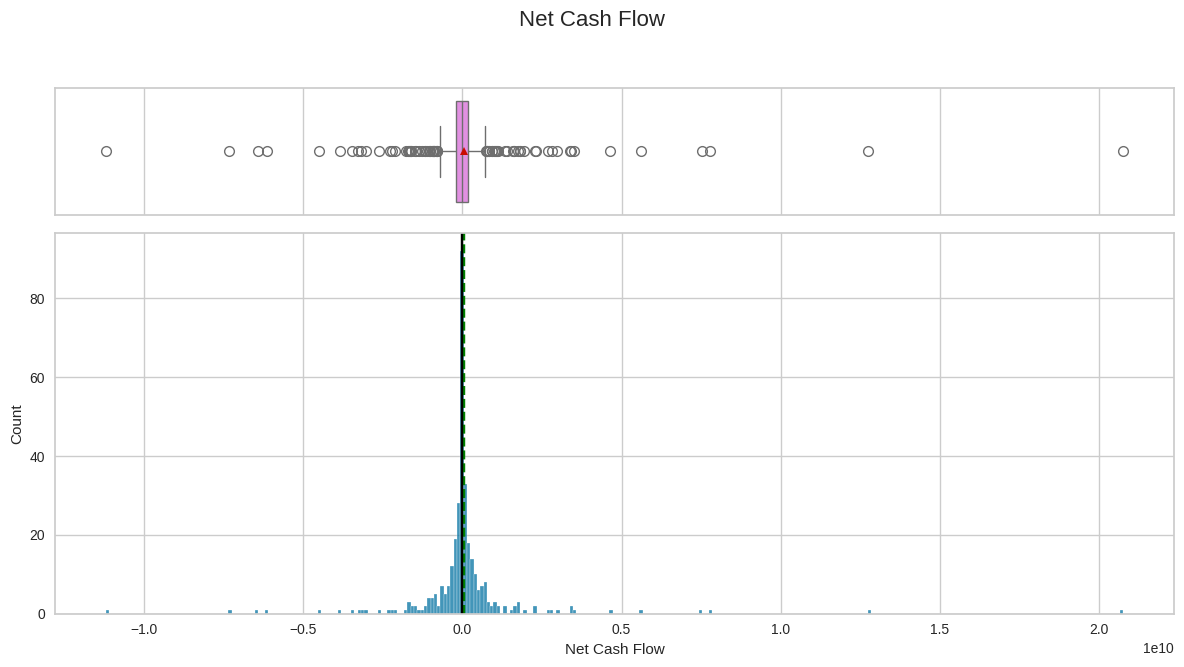

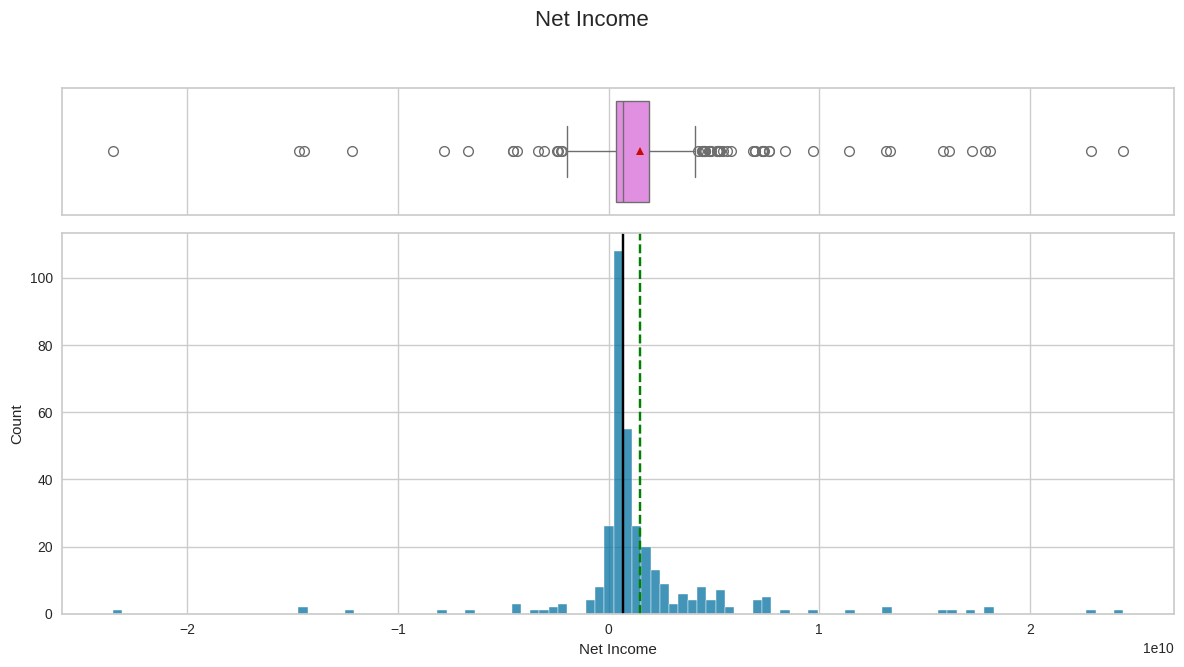

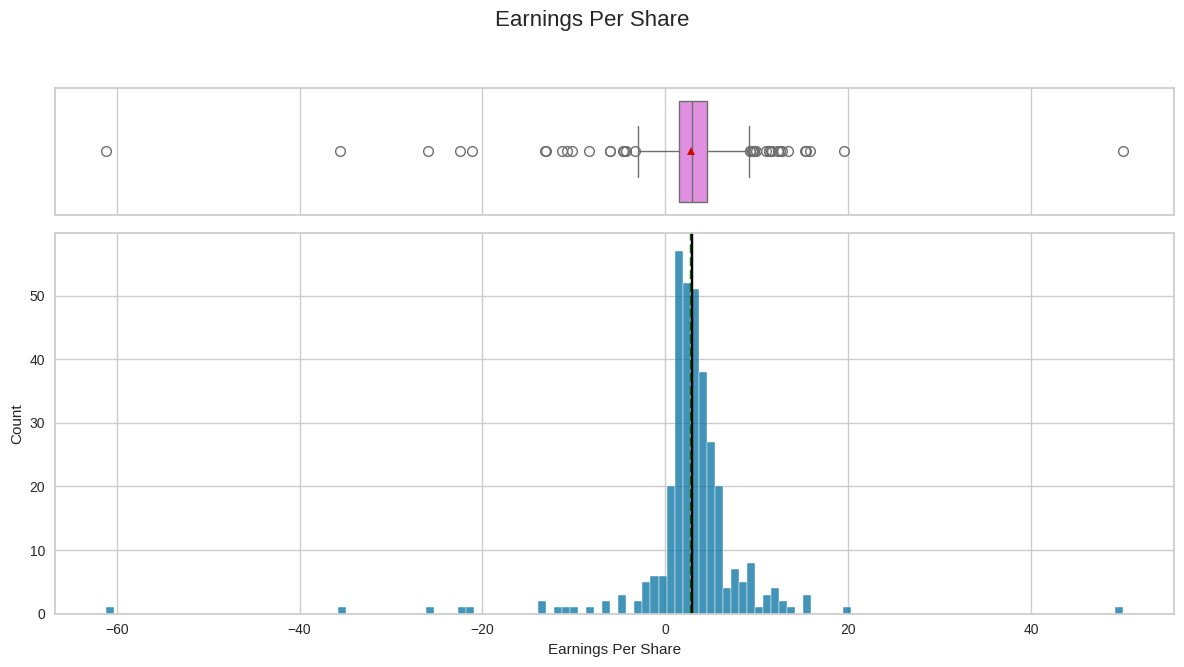

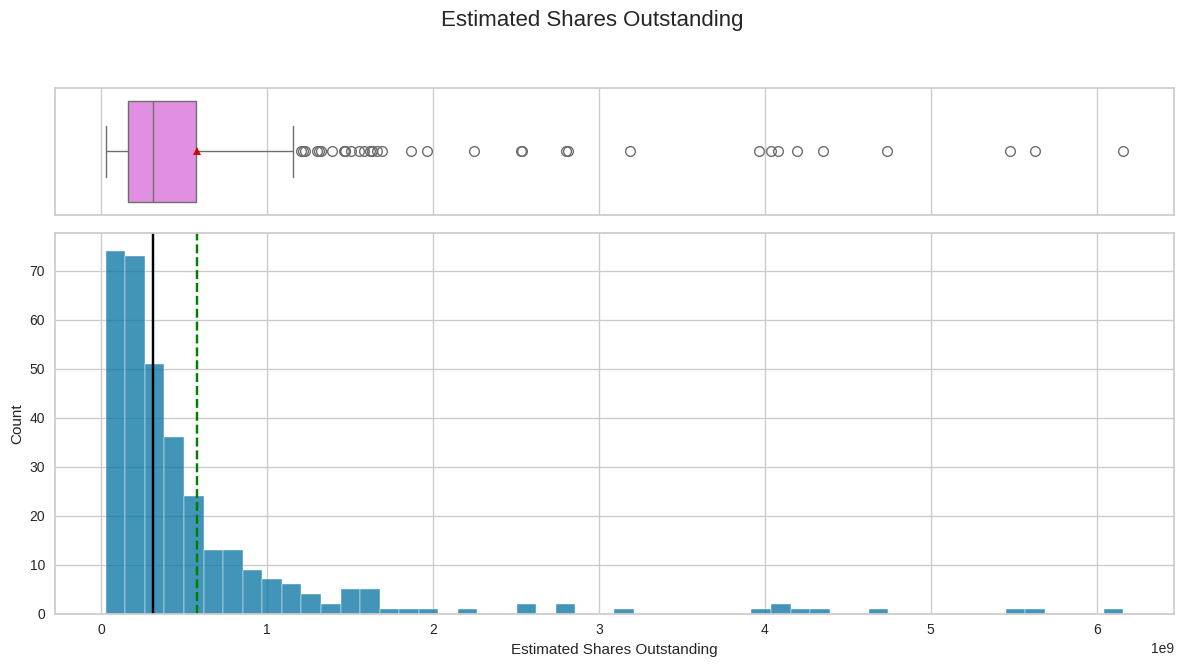

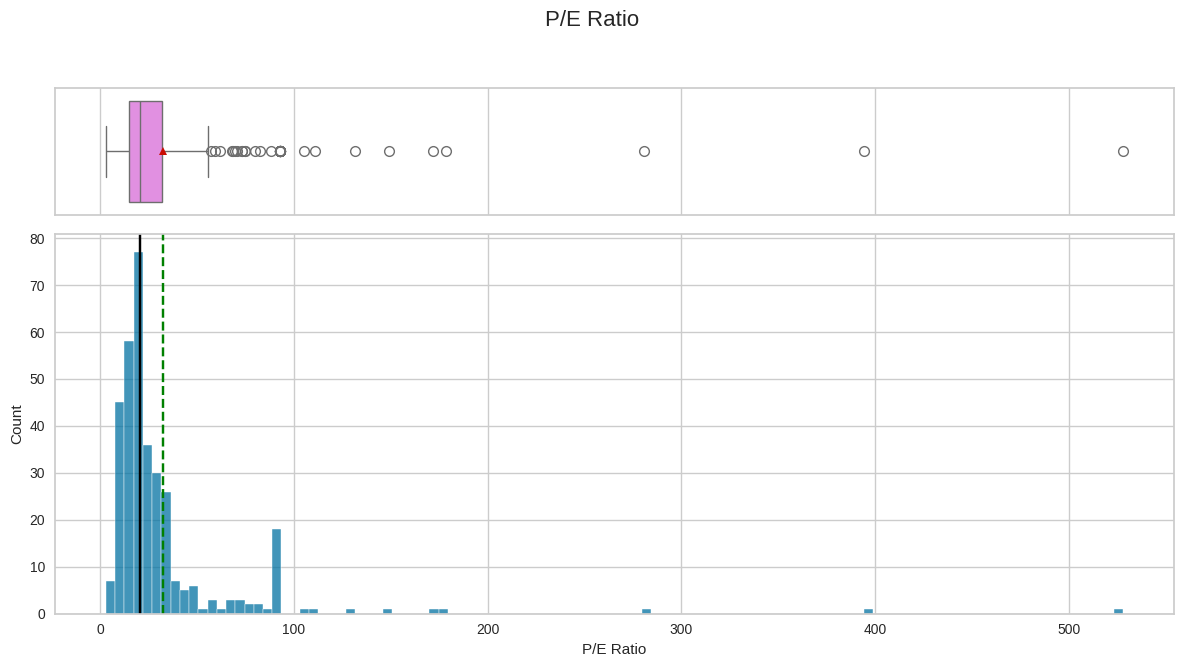

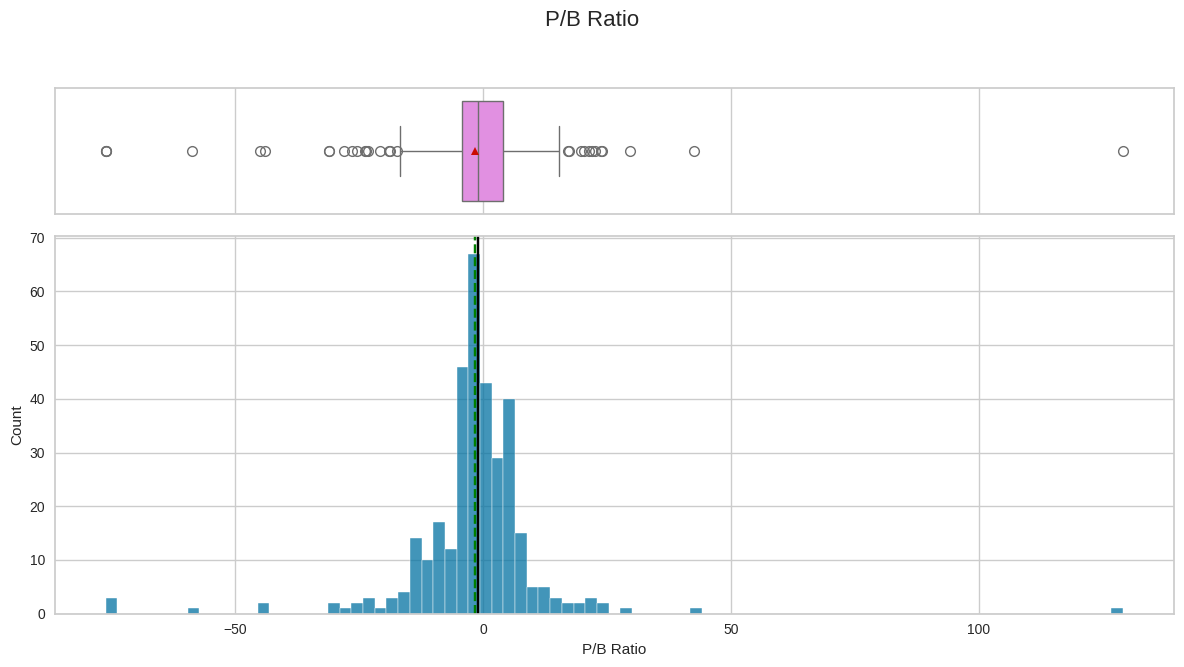

In [ ]:
# plotting all features

# Loop through each feature in the DataFrame, starting from the 5th column
for feature in data_scaled:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

The distribution for stock prices did not change. The prices distribution is right skewed, with the median to the left of the mean. This tells me most datapoints are clustered towards the lower end of the plot, and most of the stock market prices were on the lower end. The long tail also shows me there are a couple of very significant outliers in the price column.

<Axes: >

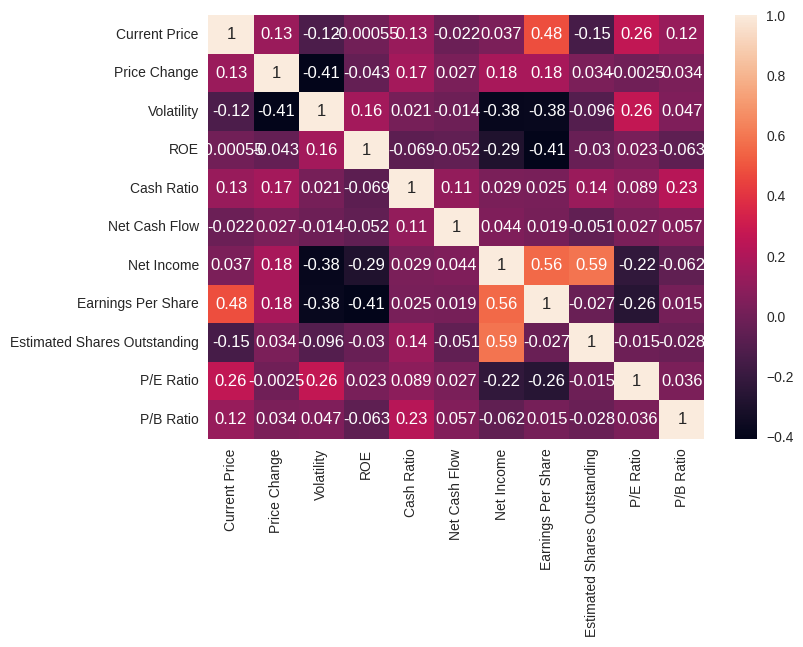

In [ ]:
# create heat map
sns.heatmap(data_scaled.corr(), annot=True)

The correlations seem to be unchanged.

## K-means Clustering

In [ ]:
# creating a k means dataframe from scaled data

k_means_df = data_scaled.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.269236715539074
Number of Clusters: 4 	Average Distortion: 2.175554082632614
Number of Clusters: 5 	Average Distortion: 2.136852169310594
Number of Clusters: 6 	Average Distortion: 2.0713095032364506
Number of Clusters: 7 	Average Distortion: 1.9775989987671811
Number of Clusters: 8 	Average Distortion: 1.9652603012304684
Number of Clusters: 9 	Average Distortion: 1.9311613101229936
Number of Clusters: 10 	Average Distortion: 1.8502089919483544
Number of Clusters: 11 	Average Distortion: 1.8248014803579016
Number of Clusters: 12 	Average Distortion: 1.7525839358924045
Number of Clusters: 13 	Average Distortion: 1.722563828836958
Number of Clusters: 14 	Average Distortion: 1.6925733787700508


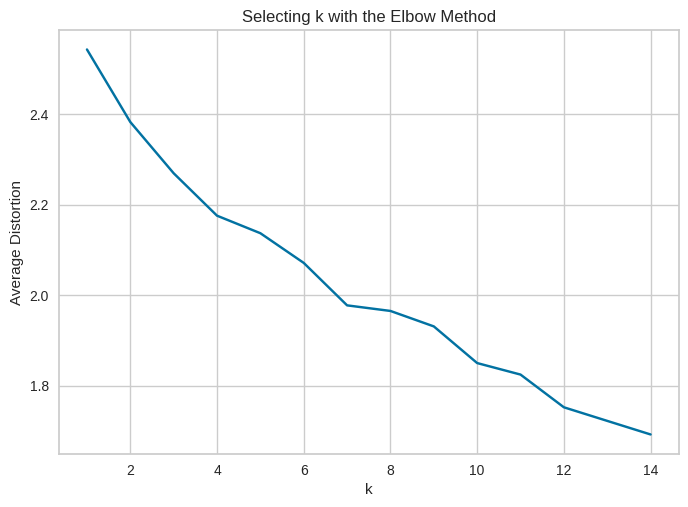

In [ ]:
# Define a range of cluster numbers to evaluate
clusters = range(1, 15)

# Initialize an empty list to store the mean distortions for each k
meanDistortions = []

# Loop over the range of cluster numbers
for k in clusters:
    # Create a KMeans model with k clusters and a fixed random state for reproducibility
    model = KMeans(n_clusters=k, random_state=1)

    # Fit the KMeans model to the subset of the scaled data
    model.fit(data_scaled)

    # Predict the cluster labels for the k_means_df dataset using the fitted model
    prediction = model.predict(k_means_df)

    # Calculate the distortion, which is the average distance bw each point and its nearest cluster center (measure of how tightly clusters are packed)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    # Append the calculated distortion to the meanDistortions list
    meanDistortions.append(distortion)

    # Print the number of clusters and the corresponding average distortion
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

# Plot the number of clusters (k) against the average distortion
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()


The plot elbow seems to be around 7. However, to be sure, we will use KElbowVisualizer to be sure my assessment of the graph is correct.

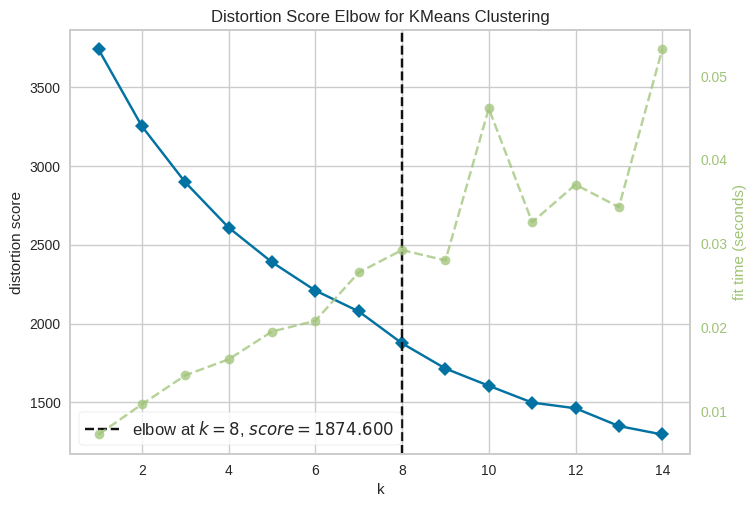

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)

# Create a KElbowVisualizer object to help find the optimal number of clusters
# The range of k values to test is from 1 to 15, and timings=True will display the time taken to fit the model for each k
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)

visualizer.fit(k_means_df)

# Display the Elbow plot, to show relationship bw num of clusters (k) and the avg distortion to identify the optimal k where the elbow occurs
visualizer.show()

The plot elbow is actually at 8. So, according to this plot, we would want to create 8 clusters for the best grouping.

Check silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.45434371948348606)
For n_clusters = 5, the silhouette score is 0.43169988466492354)
For n_clusters = 6, the silhouette score is 0.36698524210914063)
For n_clusters = 7, the silhouette score is 0.10587349598463779)
For n_clusters = 8, the silhouette score is 0.40021596082234684)
For n_clusters = 9, the silhouette score is 0.4051539505522535)
For n_clusters = 10, the silhouette score is 0.1147132918355368)
For n_clusters = 11, the silhouette score is 0.16268826704862685)
For n_clusters = 12, the silhouette score is 0.12883008320005324)
For n_clusters = 13, the silhouette score is 0.1744804713048242)
For n_clusters = 14, the silhouette score is 0.17457839075773943)


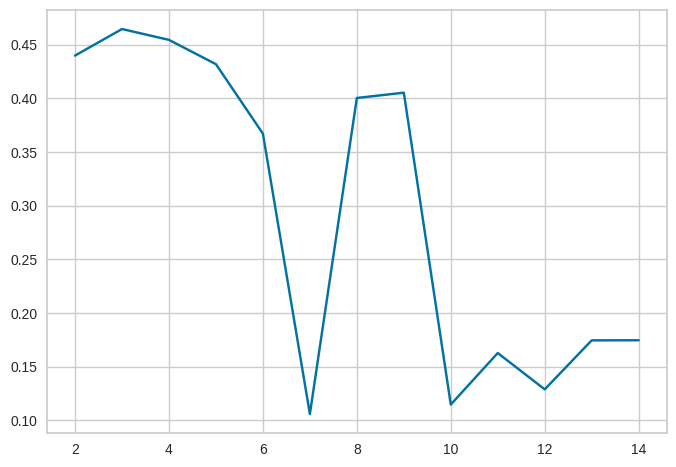

In [ ]:
# check silhouette scores

sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((data_scaled))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Based on silhouette scores, 3 or 4 seems to be the correct value for k.

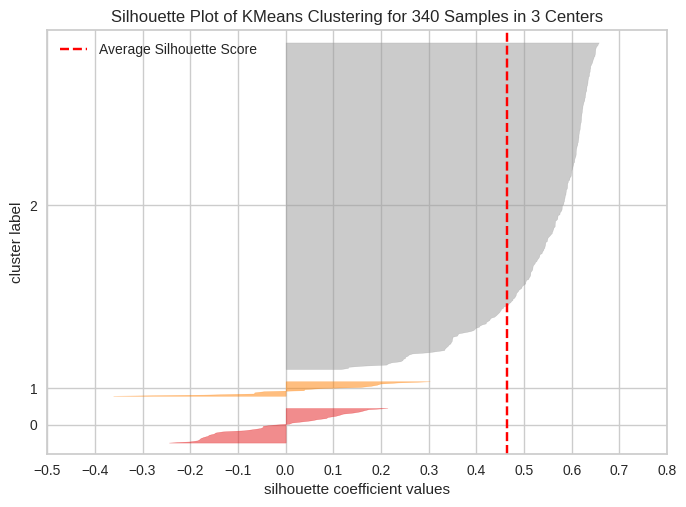

In [ ]:
# Finding optimal num of clusters w silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(data_scaled)
visualizer.show();

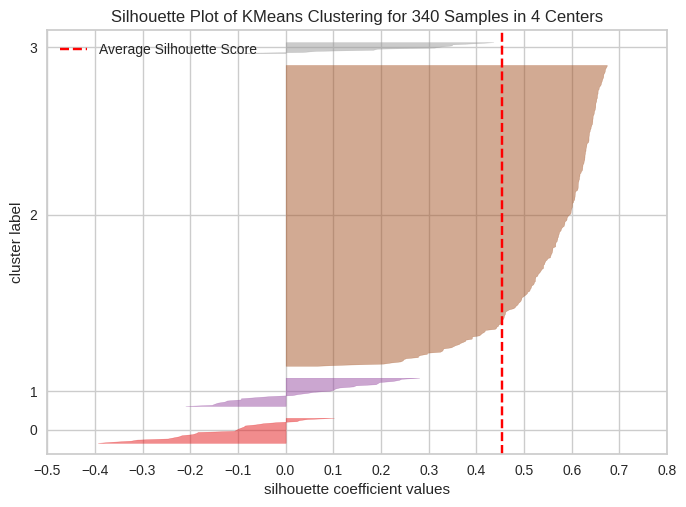

In [ ]:
# Finding optimal num of clusters w silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(data_scaled)
visualizer.show();

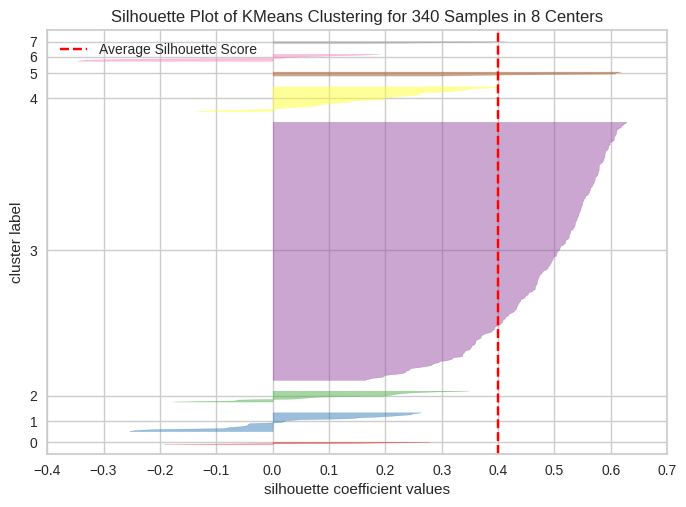

In [ ]:
# Finding optimal num of clusters w silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state = 1))
visualizer.fit(data_scaled)
visualizer.show();

3 seems to be the best k value based on silhouette coefficient values.

In [ ]:
# Choosing k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

# add k means segments col to k_means_df
k_means_df['K_means_segments'] = kmeans.labels_

# add k means segments col to df1
df1['K_means_segments'] = kmeans.labels_

In [ ]:
# Filter out numeric columns for aggregation
numeric_df = df.select_dtypes(include=[np.number])

# Group by 'K_means_segments' and calculate the mean of numeric columns
cluster_profile = numeric_df.groupby(df['K_means_segments']).mean()

# Count occurrences of values in the 'Security' column for each segment
count_series = df.groupby('K_means_segments')['Security'].count()

# Add the count as a new column in the cluster_profile dataframe
cluster_profile['count_in_each_segments'] = count_series.values

# Display the result
print(cluster_profile)

                  Current Price  Price Change  Volatility        ROE  \
K_means_segments                                                       
0                     64.183438    -10.557046    2.797776  96.531250   
1                     52.142857      6.779993    1.175153  26.142857   
2                     84.045331      5.542488    1.404255  34.040816   

                  Cash Ratio  Net Cash Flow    Net Income  Earnings Per Share  \
K_means_segments                                                                
0                  70.718750   1.591711e+08 -3.250006e+09           -7.886875   
1                 140.142857   7.602857e+08  1.336879e+10            3.769286   
2                  66.608844   1.069835e+07  1.445333e+09            3.890051   

                  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  \
K_means_segments                                                        
0                                 5.264593e+08  111.333230   1.783445   
1             

In [ ]:
#visually identify max in each col
cluster_profile.style.highlight_max(color="yellow", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
K_means_segments,,,,,,,,,,,,,
0,64.183438,-10.557046,2.797776,96.531250,70.718750,159171125.000000,-3250005968.750000,-7.886875,526459323.057500,111.333230,1.783445,0.000000,32
1,52.142857,6.779993,1.175153,26.142857,140.142857,760285714.285714,13368785714.285715,3.769286,3838879870.871428,20.654832,-3.529270,1.000000,14
2,84.045331,5.542488,1.404255,34.040816,66.608844,10698350.340136,1445333183.673469,3.890051,427206184.715408,24.613743,-2.013147,2.000000,294


In [ ]:
# print the companies in each cluster
for cl in df["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Alliance Data Systems'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Cate

In [ ]:
df1.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          2
                  Energy                         23
                  Health Care                     1
                  Industrials                     1
                  Information Technology          4
                  Materials                       1
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      4
                  Health Care                     3
                  Information Technology          2
                  Telecommunications Services     2
2                 Consumer Discretionary         37
                  Consumer Staples               18
                  Energy                          6
                  Financials                     45
                  Health Care                    36
                  Industrials                    52
                  Information Technology         27
                  Materials                      19
                  Real Estate                    27
                  Telecommunications Services     3
                  Utilities                      24
Name: Security, dtype: int64

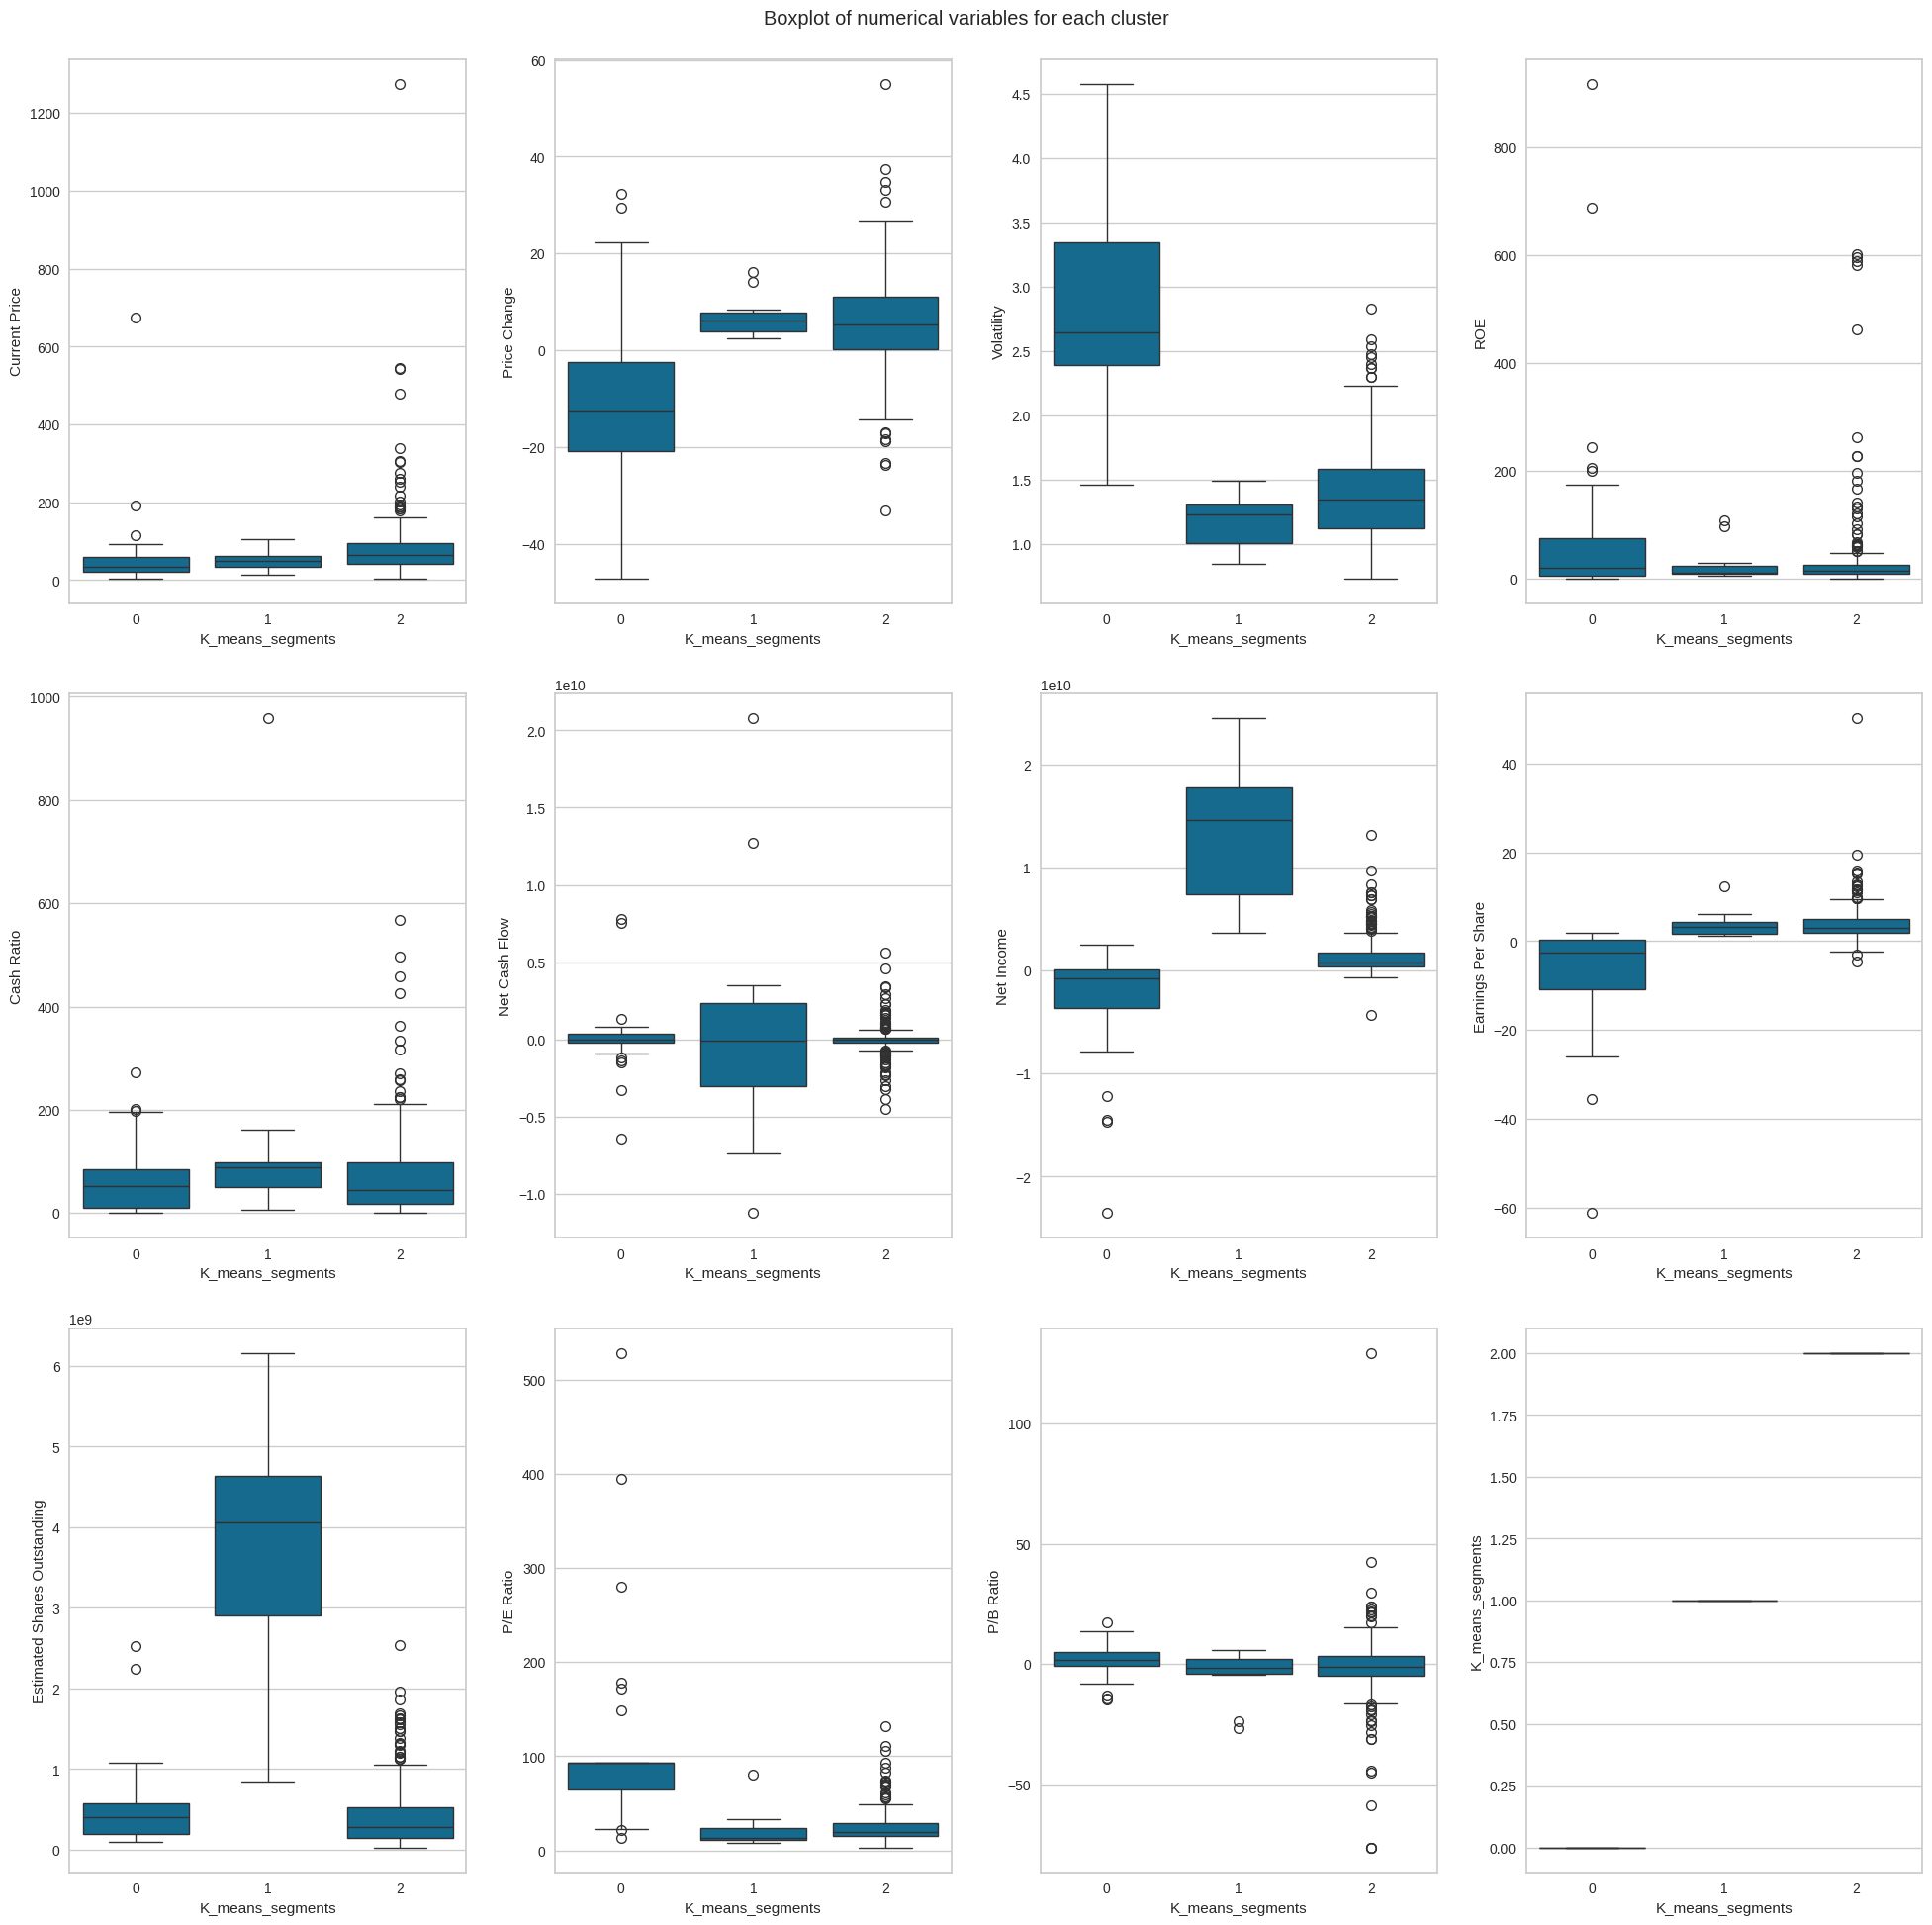

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

Cluster 0

Has about 32 different securities.
This cluster has securities with a Current_Price of $64 (in between clusters 1 and 2), and negative average Price_Change of -10.56.
As well, cluster has securities with high Volatility of 2.8, ROE of 96.5, P/E Ratio of 111.3, and P/B_Ratio of 1.8.


Cluster 1

Has about 14 different securities.
This cluster has securities with among the lowest average Current_Price of $52.
As well, cluster has securities with highest price change of 6.8, cash ratio of 140.1, Net Cash Flow of 760285714.285714, Net Income of 13368785714.285715, and Estimated Shares Outstanding of 3838879870.871428.


Cluster 2

Has the majority of securities at 294.
This cluster has securities with highest average Current_Price of $84, Earnings Per Share of 3.9, K_means_segments of 2, and count_in_each_segments of 294.


Insights:

-  Cluster 0 represents securities that are currently underperforming in terms of price but may have strong financial metrics, suggesting potential long-term value. However, their high volatility and P/E ratio indicate they are riskier investments.
- Cluster 1 represents securities that are relatively low-priced but have recently seen strong performance and have excellent financial health. These securities may be attractive to investors looking for growth opportunities in large-cap stocks with strong liquidity and profitability.
- Cluster 2 represents the largest group of securities that are relatively higher-priced with strong earnings. This cluster could include well-established companies with stable financial performance, making them attractive to investors looking for stability and consistent returns.

## Hierarchical Clustering

In [ ]:
hc_df = data_scaled.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
#now try diff linkage methods only w eucledian

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922
Cophenetic correlation for complete linkage is 0.7873280186580672
Cophenetic correlation for average linkage is 0.9422540609560814
Cophenetic correlation for centroid linkage is 0.9314012446828154
Cophenetic correlation for ward linkage is 0.7101180299865353
Cophenetic correlation for weighted linkage is 0.8693784298129404


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage


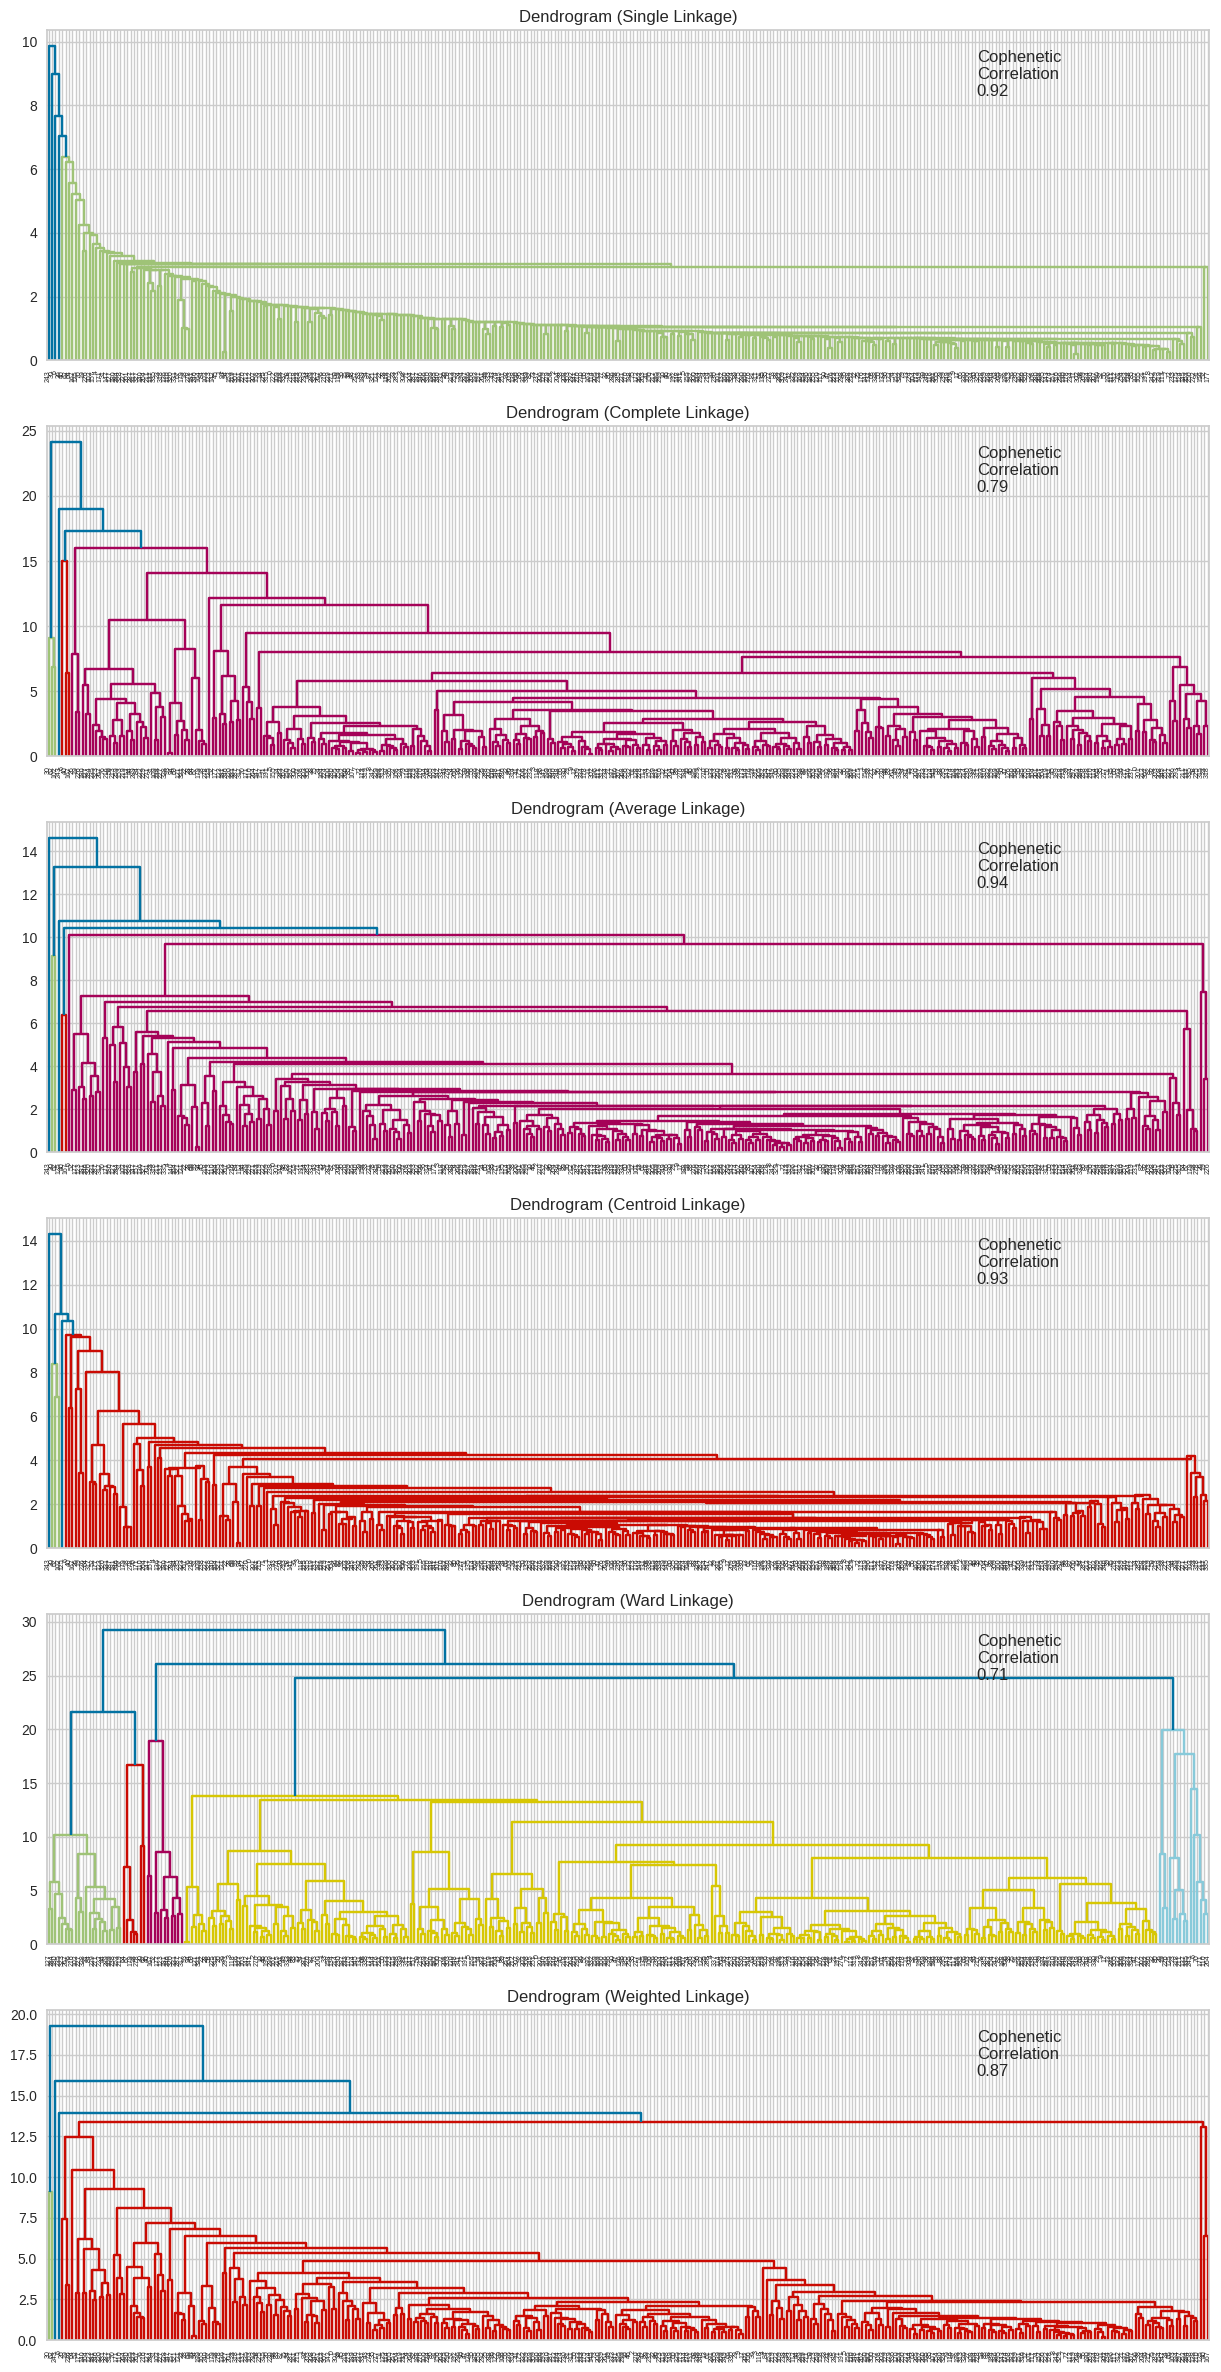

In [ ]:
# create dendrogram for the diff linkage methods using eucledian distance

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Cophenetic correlation is highest with eucledian distance and average linkages.

4 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [ ]:
# create model

HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [ ]:
# Filter out numeric columns for aggregation
numeric_df = df.select_dtypes(include=[np.number])

# Group by 'K_means_segments' and calculate the mean of numeric columns
cluster_profile = numeric_df.groupby(df['K_means_segments']).mean()

# Count occurrences of values in the 'Security' column for each segment
count_series = df.groupby('K_means_segments')['Security'].count()

# Add the count as a new column in the cluster_profile dataframe
cluster_profile['count_in_each_segments'] = count_series.values

# Display the result
print(cluster_profile)

In [ ]:
# Filter out numeric columns for aggregation
numeric_df2 = df.select_dtypes(include=[np.number])

# adding hierarchical cluster labels to the original and scaled dataframes
df_c = df.copy()
df_c["HC_segments"] = HCmodel.labels_
hc_df["HC_segments"] = HCmodel.labels_
numeric_df2["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
# cluster profiling

hc_cluster_profile = numeric_df2.groupby(df_c["HC_segments"]).mean()

In [ ]:
hc_cluster_profile["count_in_each_segments"] = (
    df_c.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="yellow", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,HC_segments,count_in_each_segments
HC_segments,,,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,1.786787,0.000000,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,1.000000,1.000000,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,0.000000,2.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1.000000,3.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,2.000000,4.000000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,2.000000,5.000000,1


The clusters have securities of 2, 2, 1, 1, and 1. This shows very minimal variability, which is not good.

In [ ]:
# print the companies in each cluster
for cl in df_c["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_c[df_c["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [ ]:
df_c.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

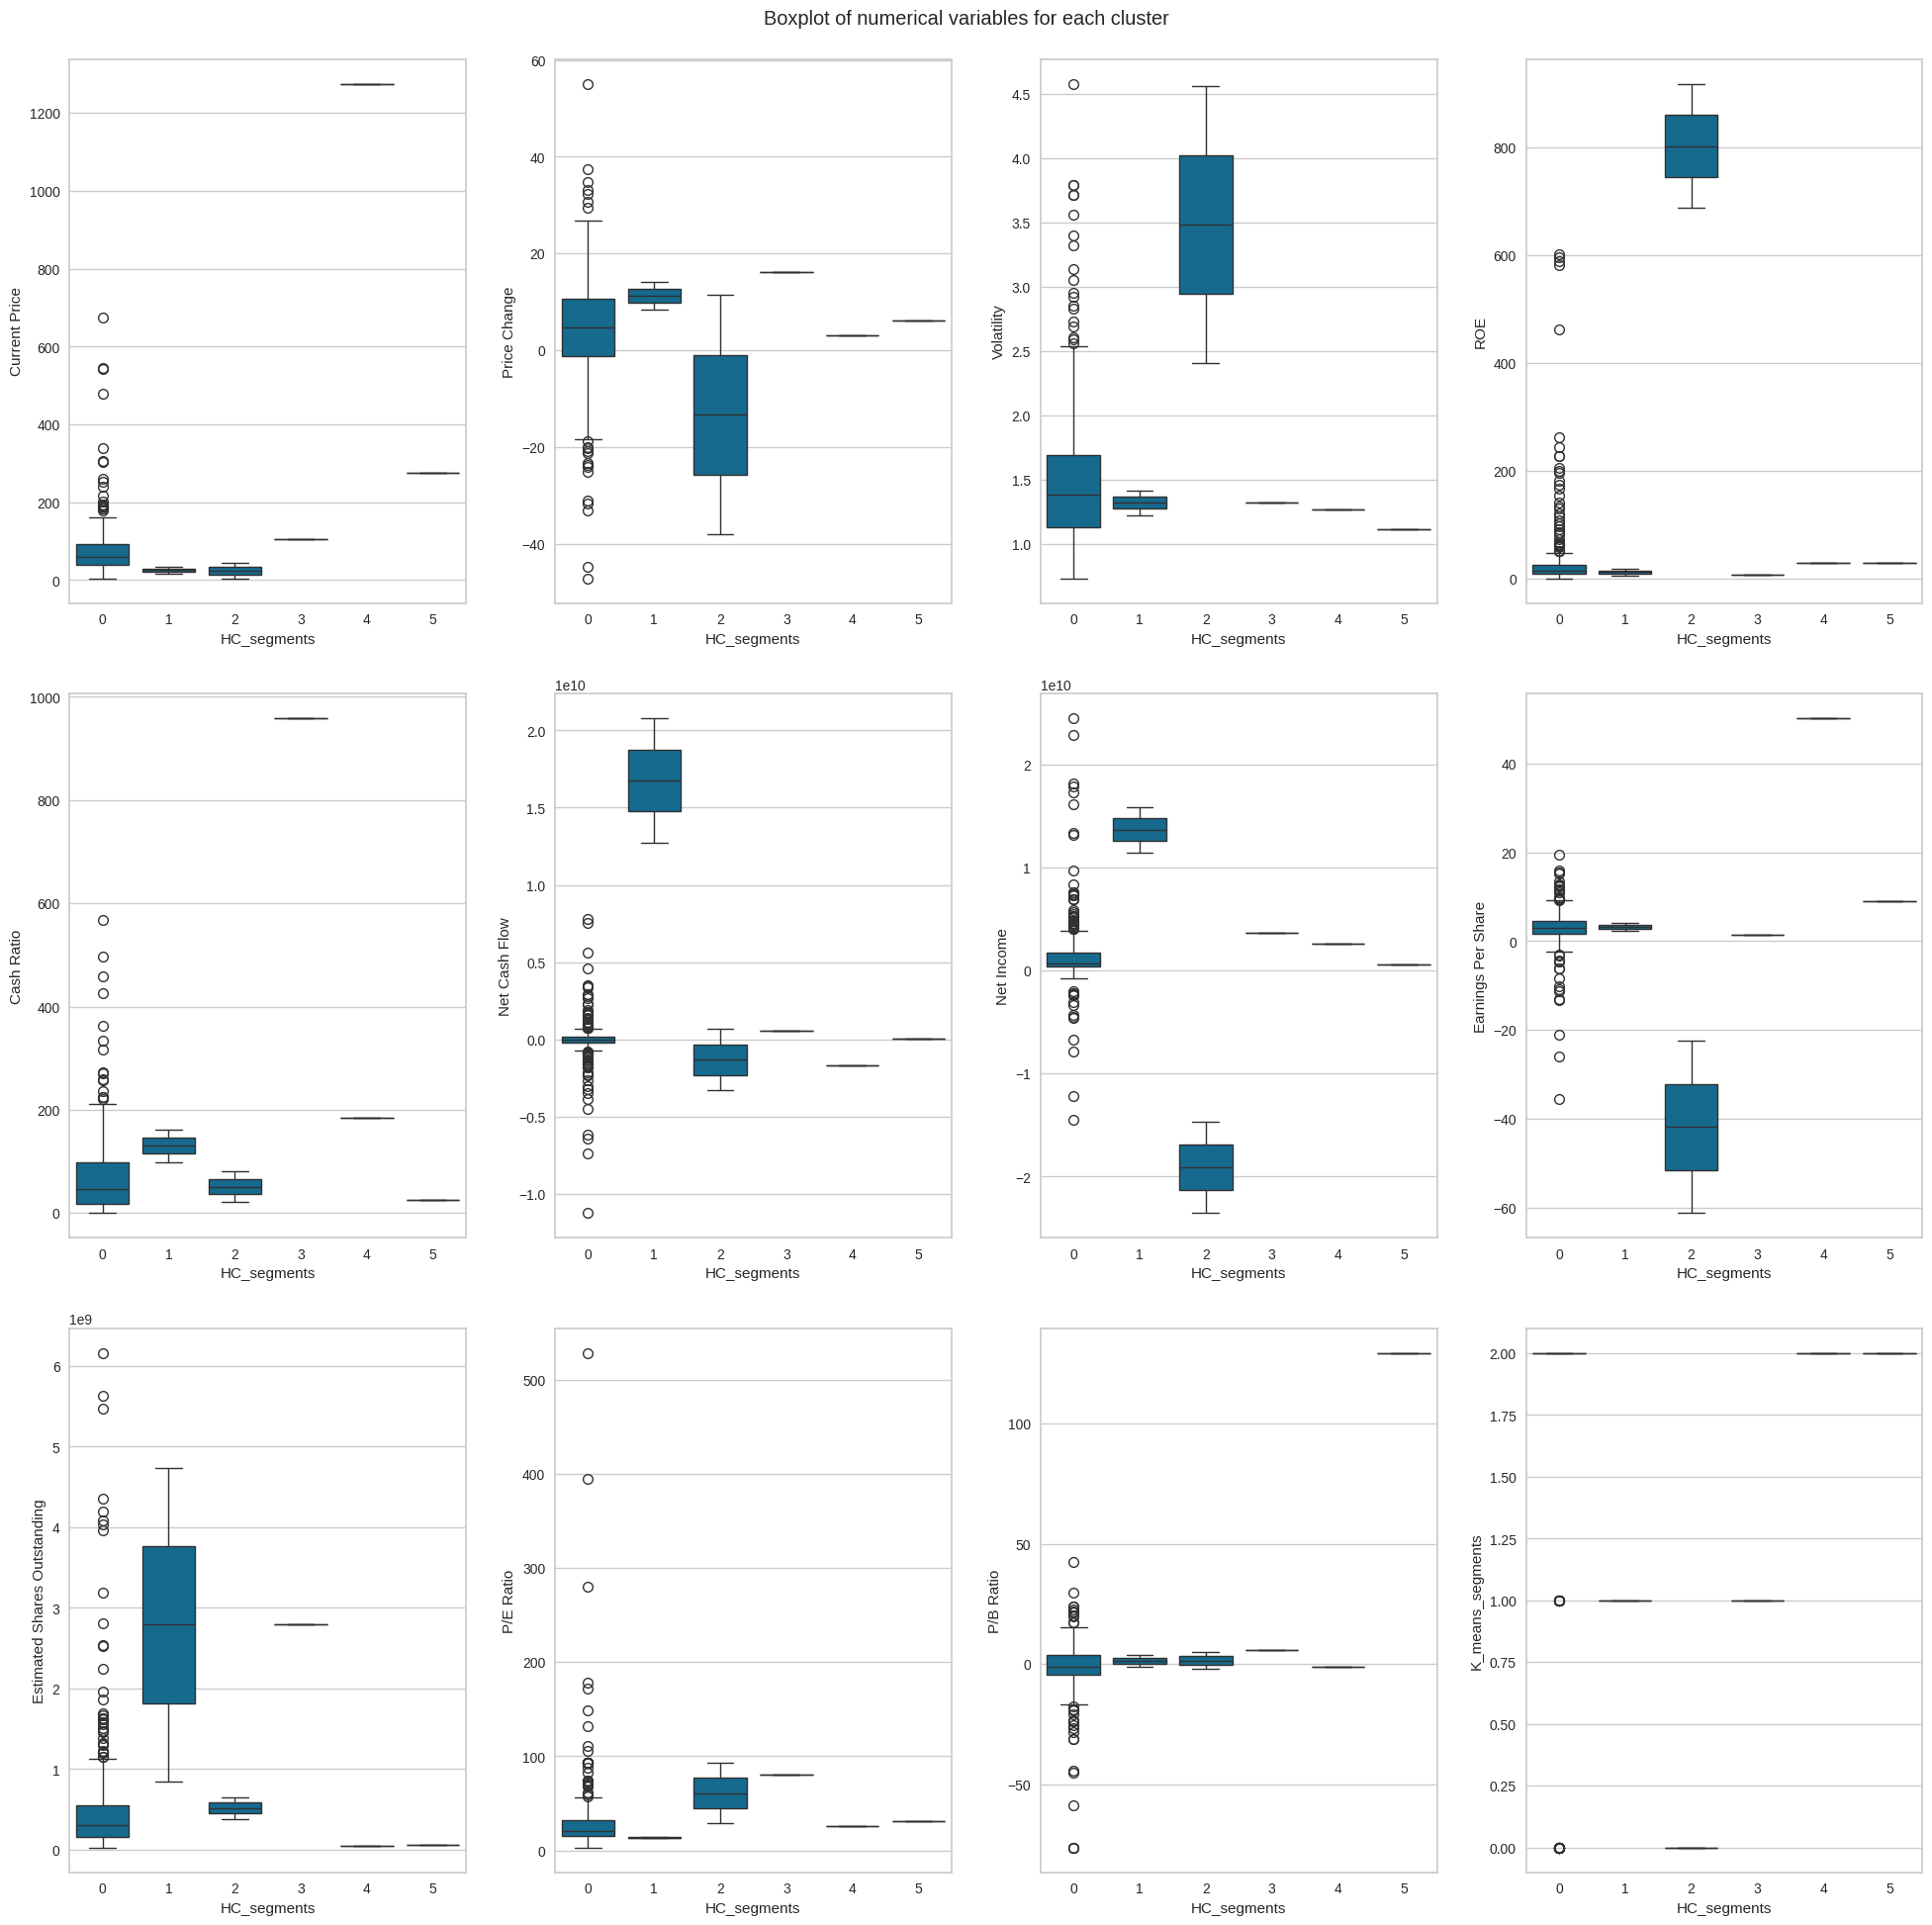

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_c, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

1. Which clustering technique took less time for execution?

In [ ]:
import time
from sklearn.cluster import KMeans, AgglomerativeClustering

# Timing K-Means with 3 clusters
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(numeric_df)  # Replace df with your dataset
kmeans_time = time.time() - start_time
print(f"K-Means with 3 clusters execution time: {kmeans_time:.4f} seconds")

# Timing Hierarchical Clustering with 4 clusters
start_time = time.time()
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='average')  # You can change linkage method as needed
hierarchical.fit(numeric_df)  # Replace df with your dataset
hierarchical_time = time.time() - start_time
print(f"Hierarchical Clustering with 4 clusters execution time: {hierarchical_time:.4f} seconds")

# Compare times
if kmeans_time < hierarchical_time:
    print("K-Means with 3 clusters is faster.")
else:
    print("Hierarchical Clustering with 4 clusters is faster.")

K-Means with 3 clusters execution time: 0.0503 seconds
Hierarchical Clustering with 4 clusters execution time: 0.0170 seconds
Hierarchical Clustering with 4 clusters is faster.


2. Which clustering technique gave you more distinct clusters, or are they the same?

In [ ]:
# K-Means clustering with 3 clusters
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(numeric_df, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# Hierarchical Clustering with 4 clusters
hierarchical_labels = hierarchical.labels_
hierarchical_silhouette = silhouette_score(numeric_df, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")

# Compare the silhouette scores
if kmeans_silhouette > hierarchical_silhouette:
    print("K-Means produced more distinct clusters.")
else:
    print("Hierarchical Clustering produced more distinct clusters.")

K-Means Silhouette Score: 0.8070
Hierarchical Clustering Silhouette Score: 0.8042
K-Means produced more distinct clusters.


3. How many observations are there in the similar clusters of both algorithms?

Since there were 3 clusters in the k-means model and 4 clusters in the hierarchical model, none of the groups were very similar between models.

4. How many clusters are obtained as the appropriate number of clusters from both algorithms?

The k-means model used only 3 clusters, while the hierarchical model used 4.

## Actionable Insights and Recommendations

- Using the k-means clustering algorithm, Trade&Ahead can input data comprising of stock prices and  financial indicators for companies under the New York Stock Exchange. This will group the data into 3 clusters (since that was the ideal number of clusters for the k-means clustering algorithm), which will help with identifying characteristics of each group, and better inform how to advise their cutomers on which stocks they should invest their money in.
- Using the hierarchical clustering algorithm, Trade&Ahead can input thhe same dataset as the k-means clustering algorithm. However, this model will group the data into 4 clusters instead of 3 (since that was the ideal number of clusters for the hierarchical clustering algorithm), which will also help with identifying characteristics of each group, and better inform how to advise their cutomers on which stocks they should invest their money in.
- The main difference between these 2 algorithms lies in how aggressively you want to separate your data. However, I think providing both these models to the company will allow them to use whichever they think is a better fit, or they can use both, interpret results, then give even more informed advice to their customers.

In [ ]:
!jupyter nbconvert PROJECT_stock_Todd-2.ipynb --to html

[NbConvertApp] Converting notebook PROJECT_stock_Todd-2.ipynb to html
[NbConvertApp] Writing 3886906 bytes to PROJECT_stock_Todd-2.html
